In [17]:
# from google.colab import drive
# drive.mount('/content/drive')

The dataset used is the United States Drought Monitor, which serves as a classification dataset featuring six levels of drought, encompassing "None" (indicating no drought) and five distinct drought levels. Each entry within the dataset represents a drought level at a specific point in time within a particular U.S. county. This classification is accompanied by the previous 90 days' worth of 18 meteorological indicators.

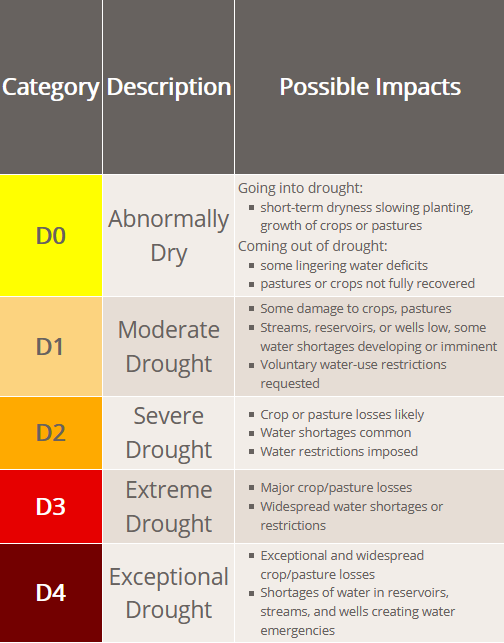

| Indicator      | Description                                   |
|--------------- |-----------------------------------------------|
| WS10M_MIN      | Minimum Wind Speed at 10 Meters (m/s)       |
| QV2M           | Specific Humidity at 2 Meters (g/kg)         |
| T2M_RANGE      | Temperature Range at 2 Meters (C)            |
| WS10M          | Wind Speed at 10 Meters (m/s)               |
| T2M           | Temperature at 2 Meters (C)                 |
| WS50M_MIN     | Minimum Wind Speed at 50 Meters (m/s)       |
| T2M_MAX       | Maximum Temperature at 2 Meters (C)        |
| WS50M         | Wind Speed at 50 Meters (m/s)               |
| TS            | Earth Skin Temperature (C)                  |
| WS50M_RANGE   | Wind Speed Range at 50 Meters (m/s)         |
| WS50M_MAX     | Maximum Wind Speed at 50 Meters (m/s)       |
| WS10M_MAX     | Maximum Wind Speed at 10 Meters (m/s)       |
| WS10M_RANGE   | Wind Speed Range at 10 Meters (m/s)         |
| PS            | Surface Pressure (kPa)                      |
| T2MDEW        | Dew/Frost Point at 2 Meters (C)             |
| T2M_MIN       | Minimum Temperature at 2 Meters (C)        |
| T2MWET        | Wet Bulb Temperature at 2 Meters (C)        |
| PRECTOT       | Precipitation (mm day-1)                    |


# Importing Libraries

In [18]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle

#Reading the input data




In [19]:
drought_df = pd.read_csv(r'Datasets\validation_timeseries.csv')
drought_df.head(20)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2017-01-01,32.50,100.02,10.47,14.69,14.47,14.47,17.68,10.53,...,14.63,2.14,2.71,1.52,1.19,4.40,5.96,2.25,3.71,NaN
1,1001,2017-01-02,63.52,100.04,12.75,17.96,17.75,17.75,20.30,16.14,...,17.85,2.75,4.31,1.60,2.71,5.50,8.16,4.05,4.11,NaN
2,1001,2017-01-03,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,...,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0
3,1001,2017-01-04,0.01,100.02,5.21,8.10,3.86,3.88,11.74,2.12,...,8.08,2.63,3.95,1.34,2.60,4.98,6.16,3.36,2.80,NaN
4,1001,2017-01-05,0.01,99.89,4.54,5.91,2.20,2.22,13.07,-0.18,...,5.85,1.76,2.76,0.47,2.28,3.43,4.70,0.66,4.04,NaN
5,1001,2017-01-06,19.85,100.34,3.31,0.35,-2.02,-2.00,4.74,-4.25,...,0.42,3.31,3.98,2.15,1.83,5.29,6.03,3.82,2.21,NaN
6,1001,2017-01-07,0.06,101.59,1.80,-6.49,-9.40,-9.28,-1.02,-11.57,...,-7.05,3.64,4.47,2.84,1.63,6.51,7.68,4.75,2.94,NaN
7,1001,2017-01-08,0.00,102.36,1.87,-6.38,-9.11,-9.02,0.68,-12.89,...,-8.36,2.18,2.81,1.16,1.65,3.69,4.66,1.93,2.73,NaN
8,1001,2017-01-09,0.00,101.98,2.67,-2.14,-4.85,-4.81,5.20,-9.54,...,-3.05,2.39,2.74,1.70,1.04,4.61,7.01,2.77,4.23,NaN
9,1001,2017-01-10,0.02,101.13,5.62,5.92,4.54,4.55,12.42,-2.37,...,5.81,3.22,4.24,2.52,1.72,6.19,7.55,4.68,2.86,2.0


# Initial exploration and data cleaning (Data Wrangling)

* The 'info()' method is used to display essential information about the DataFrame
'drought_df'.
* This information typically includes data types, non-null counts, and memory usage for each column.
* It is a helpful way to quickly inspect the structure and properties of the DataFrame.



In [20]:
drought_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268840 entries, 0 to 2268839
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 363.5+ MB


* Calculate the sum of missing (null) values for each column in the 'drought_df' DataFrame.


In [21]:
drought_df.isnull().sum()

fips                 0
date                 0
PRECTOT              0
PS                   0
QV2M                 0
T2M                  0
T2MDEW               0
T2MWET               0
T2M_MAX              0
T2M_MIN              0
T2M_RANGE            0
TS                   0
WS10M                0
WS10M_MAX            0
WS10M_MIN            0
WS10M_RANGE          0
WS50M                0
WS50M_MAX            0
WS50M_MIN            0
WS50M_RANGE          0
score          1945608
dtype: int64

# Missing value Treatment

In [22]:
# Removing the null values in the target variable as the drought score is only available for once in 7 days.
drought_df = drought_df.dropna()
drought_df.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

# Reformatting the data

In [23]:
drought_df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score          float64
dtype: object

In [25]:
# Extract the year from the 'date' column using the Pandas DatetimeIndex and assign it to a new 'year' column.
drought_df['year'] = pd.DatetimeIndex(drought_df['date']).year

# Extract the month from the 'date' column and assign it to a new 'month' column.
drought_df['month'] = pd.DatetimeIndex(drought_df['date']).month

# Extract the day from the 'date' column and assign it to a new 'day' column.
drought_df['day'] = pd.DatetimeIndex(drought_df['date']).day

# Round the values in the 'score' column and change the data type to integer.
drought_df['score'] = drought_df['score'].round().astype(int)

# Display the data types of each column in the 'drought_df' DataFrame.
drought_df.dtypes

drought_df = drought_df.drop('date',axis=1)


The term "FIPS" in a dataset like the drought dataset likely refers to the Federal Information Processing Standards (FIPS) code. In this context, a FIPS code is a unique identifier used to represent geographical entities, such as states, counties, and other administrative divisions within the United States.

For the drought dataset, the 'fips' column likely contains these FIPS codes, which can be used to associate specific geographic regions or areas with the data in the dataset. Each FIPS code corresponds to a particular geographic area or location, allowing data to be organized and analyzed based on these regions. These codes are useful for conducting geospatial or regional analysis with the dataset.

In [26]:
# Calculate the number of unique values in the 'fips' column of the 'drought_df' DataFrame.

drought_df['fips'].nunique()

3108

In [27]:
# Round the values in the 'score' column to the nearest integer and then count the occurrences of each unique rounded value.
drought_df['score'].round().value_counts()

score
0    220516
1     56389
2     28498
3     12334
4      4577
5       918
Name: count, dtype: int64

# **Exploraory Data Analysis**

# Univariate Analysis - Descriptive statistics

In [29]:
# Display descriptive statistics for the 'drought_df' DataFrame.
# The first 'describe()' call provides statistics for numeric columns.
display(drought_df.describe())

# The second 'describe()' call provides statistics for categorical (object) columns.
# display(drought_df.describe(include=['object']))
display(drought_df.describe())

# Calculate and print the skewness of each numeric column.
print("\nSkewness: \n", drought_df.skew(axis=0, skipna=True))

# Calculate and print the kurtosis of each numeric column.
print("\nKurtosis: \n", drought_df.kurtosis(axis=0, skipna=True))


,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
count,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,...,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000
mean,30670.376770,2.927214,96.684440,8.333459,13.295507,7.854001,7.868833,18.958342,8.085257,10.873111,...,1.901412,3.245704,5.482770,7.743991,3.103669,4.640333,0.536101,2017.500000,6.451923,15.971154
std,14979.130559,6.586135,5.425649,4.934976,10.869815,10.534395,10.381420,11.399701,10.645347,3.887730,...,1.349835,1.943274,2.354709,2.908380,2.120535,2.175164,0.938458,0.500001,3.447077,8.753537
min,1001.000000,0.000000,67.090000,0.250000,-29.180000,-29.820000,-29.490000,-23.010000,-32.840000,0.160000,...,0.000000,0.220000,0.660000,1.200000,0.010000,0.480000,0.000000,2017.000000,1.000000,1.000000
25%,19044.500000,0.000000,95.900000,3.970000,4.930000,-0.200000,-0.230000,10.660000,-0.220000,8.110000,...,0.940000,1.790000,3.740000,5.600000,1.420000,3.090000,0.000000,2017.000000,3.750000,8.750000
50%,29212.000000,0.210000,98.290000,7.510000,14.820000,9.020000,8.930000,21.020000,8.960000,10.810000,...,1.640000,2.780000,5.090000,7.270000,2.770000,4.210000,0.000000,2017.500000,6.500000,16.000000
75%,46007.500000,2.590000,99.960000,12.370000,22.660000,16.960000,16.900000,28.150000,17.230000,13.510000,...,2.560000,4.230000,6.850000,9.430000,4.370000,5.740000,1.000000,2018.000000,9.250000,24.000000
max,56043.000000,178.540000,104.010000,20.800000,40.270000,25.960000,25.960000,50.030000,32.150000,30.230000,...,16.000000,18.160000,21.780000,26.680000,19.490000,21.240000,5.000000,2018.000000,12.000000,31.000000


,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
count,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,...,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000,323232.000000
mean,30670.376770,2.927214,96.684440,8.333459,13.295507,7.854001,7.868833,18.958342,8.085257,10.873111,...,1.901412,3.245704,5.482770,7.743991,3.103669,4.640333,0.536101,2017.500000,6.451923,15.971154
std,14979.130559,6.586135,5.425649,4.934976,10.869815,10.534395,10.381420,11.399701,10.645347,3.887730,...,1.349835,1.943274,2.354709,2.908380,2.120535,2.175164,0.938458,0.500001,3.447077,8.753537
min,1001.000000,0.000000,67.090000,0.250000,-29.180000,-29.820000,-29.490000,-23.010000,-32.840000,0.160000,...,0.000000,0.220000,0.660000,1.200000,0.010000,0.480000,0.000000,2017.000000,1.000000,1.000000
25%,19044.500000,0.000000,95.900000,3.970000,4.930000,-0.200000,-0.230000,10.660000,-0.220000,8.110000,...,0.940000,1.790000,3.740000,5.600000,1.420000,3.090000,0.000000,2017.000000,3.750000,8.750000
50%,29212.000000,0.210000,98.290000,7.510000,14.820000,9.020000,8.930000,21.020000,8.960000,10.810000,...,1.640000,2.780000,5.090000,7.270000,2.770000,4.210000,0.000000,2017.500000,6.500000,16.000000
75%,46007.500000,2.590000,99.960000,12.370000,22.660000,16.960000,16.900000,28.150000,17.230000,13.510000,...,2.560000,4.230000,6.850000,9.430000,4.370000,5.740000,1.000000,2018.000000,9.250000,24.000000
max,56043.000000,178.540000,104.010000,20.800000,40.270000,25.960000,25.960000,50.030000,32.150000,30.230000,...,16.000000,18.160000,21.780000,26.680000,19.490000,21.240000,5.000000,2018.000000,12.000000,31.000000



Skewness: 
 fips          -0.077368
PRECTOT        4.696459
PS            -2.136181
QV2M           0.393559
T2M           -0.471540
T2MDEW        -0.411979
T2MWET        -0.359255
T2M_MAX       -0.522371
T2M_MIN       -0.389659
T2M_RANGE      0.151965
TS            -0.440709
WS10M          1.178434
WS10M_MAX      1.010529
WS10M_MIN      1.525542
WS10M_RANGE    1.356531
WS50M          0.918241
WS50M_MAX      0.989036
WS50M_MIN      0.910764
WS50M_RANGE    1.302663
score          1.936850
year           0.000000
month         -0.016903
day            0.009069
dtype: float64

Kurtosis: 
 fips           -1.100134
PRECTOT        37.994212
PS              4.844448
QV2M           -1.039084
T2M            -0.585600
T2MDEW         -0.658338
T2MWET         -0.777382
T2M_MAX        -0.497585
T2M_MIN        -0.547148
T2M_RANGE      -0.214139
TS             -0.583237
WS10M           1.945595
WS10M_MAX       1.141111
WS10M_MIN       4.549398
WS10M_RANGE     2.472745
WS50M           1.195245
WS50M_M

In [30]:
# Create a list of column names from the 'drought_df' DataFrame and store it in the 'column_list' variable.
column_list = list(drought_df.columns)

# The 'column_list' now contains the names of all columns in the DataFrame.
column_list

['fips',
 'PRECTOT',
 'PS',
 'QV2M',
 'T2M',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'T2M_RANGE',
 'TS',
 'WS10M',
 'WS10M_MAX',
 'WS10M_MIN',
 'WS10M_RANGE',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN',
 'WS50M_RANGE',
 'score',
 'year',
 'month',
 'day']

# Univariate Analysis - Distribution of continuous variables

In [31]:
# Create a list called 'measures_column_list' containing the names of specific columns related to meteorological measures.
measures_column_list = ['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE']

# Create a new DataFrame 'drought_df_measures' by selecting columns from 'drought_df' based on the 'measures_column_list'.
drought_df_measures = drought_df[measures_column_list]

# 'drought_df_measures' now contains only the columns related to meteorological measures specified in 'measures_column_list'.


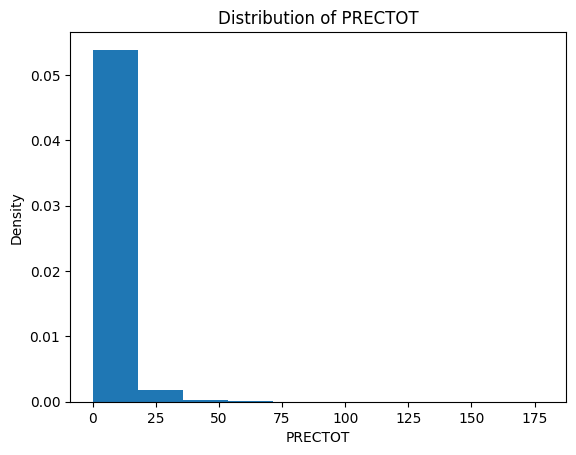

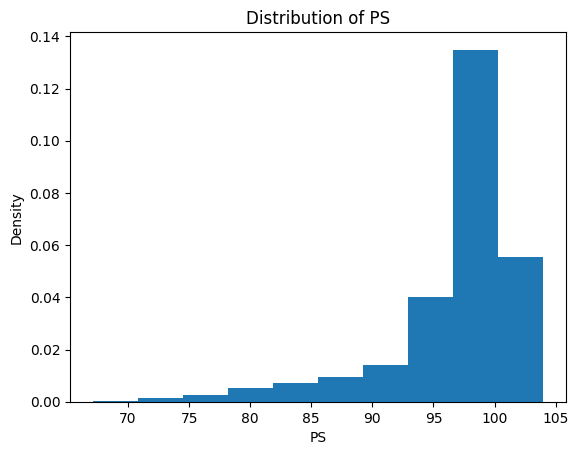

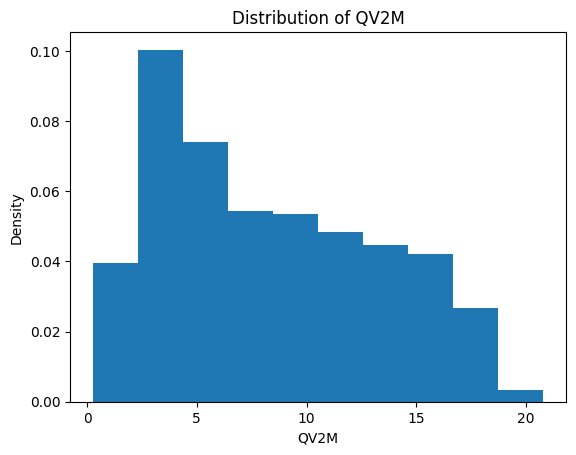

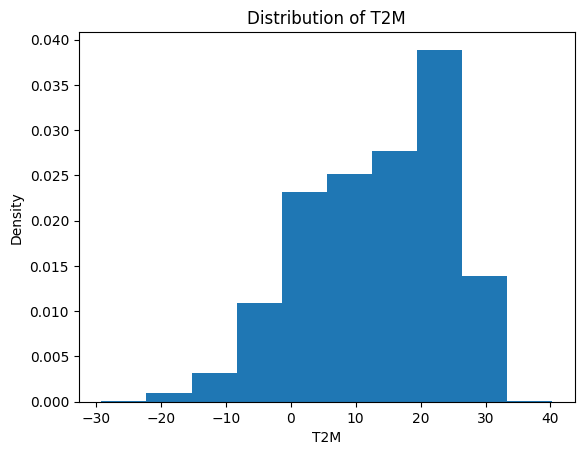

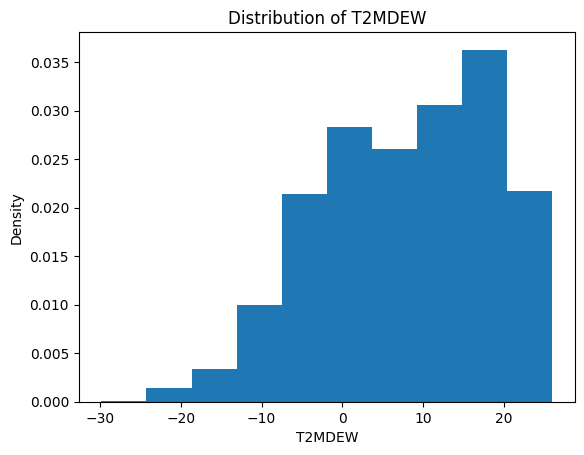

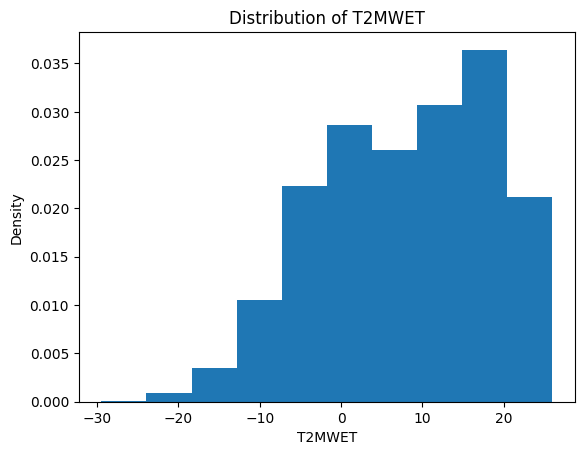

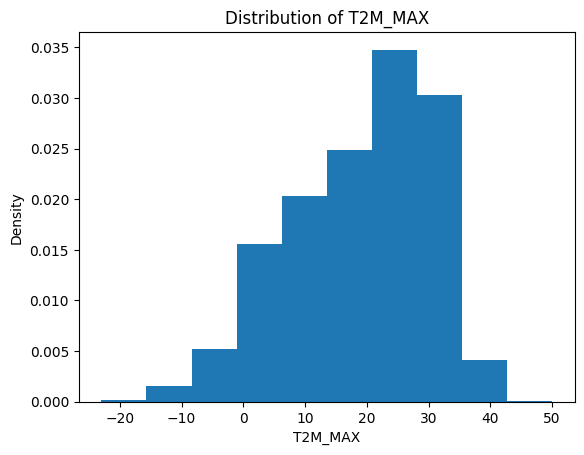

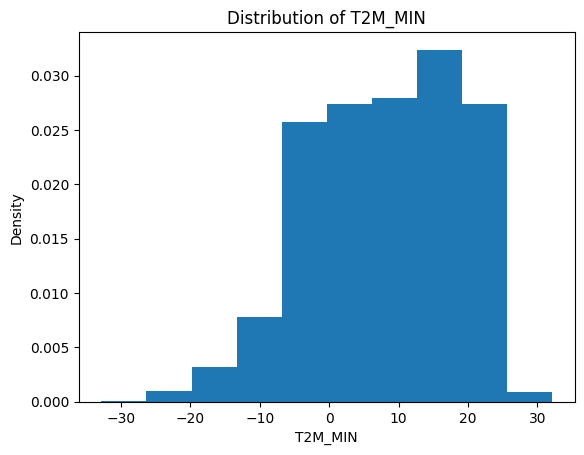

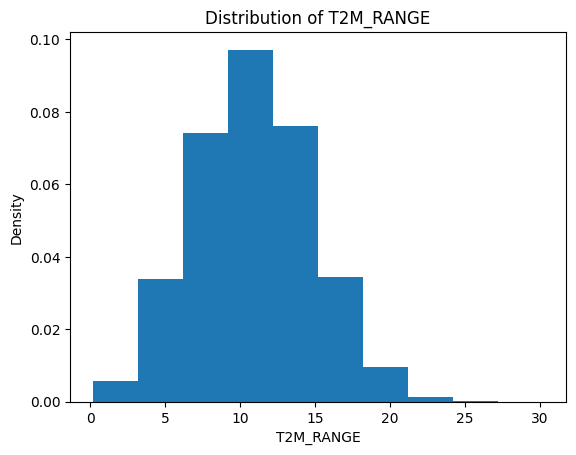

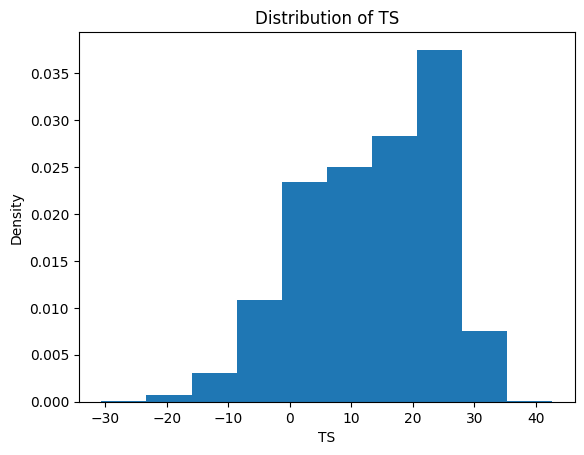

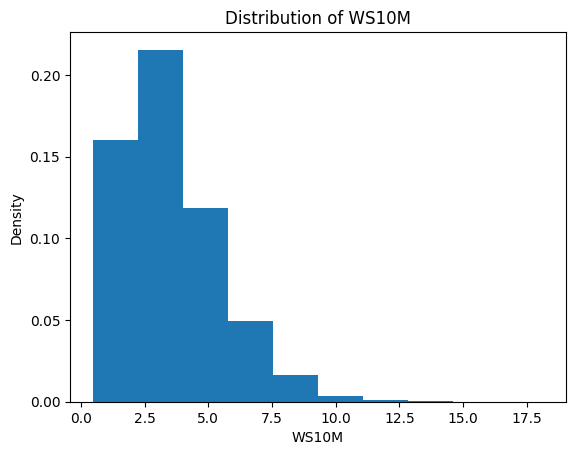

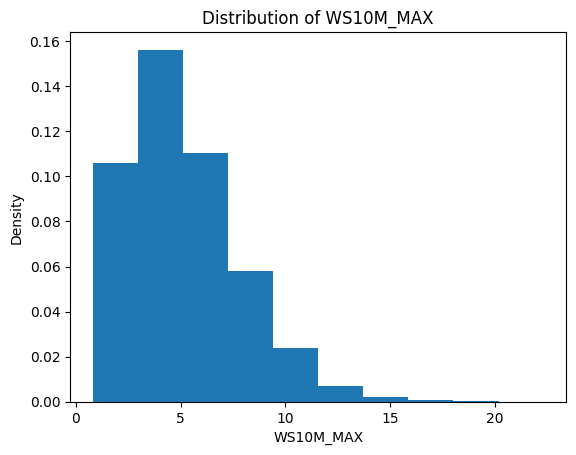

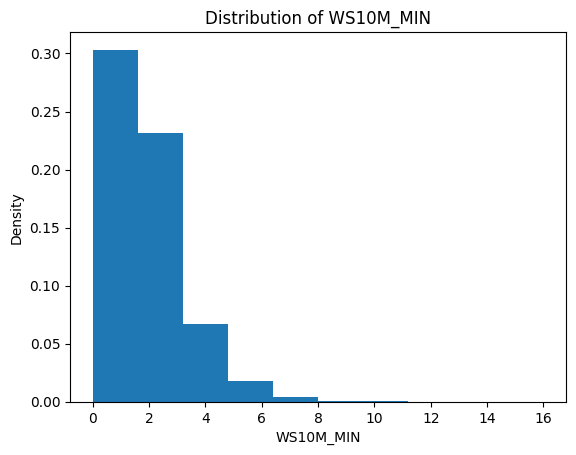

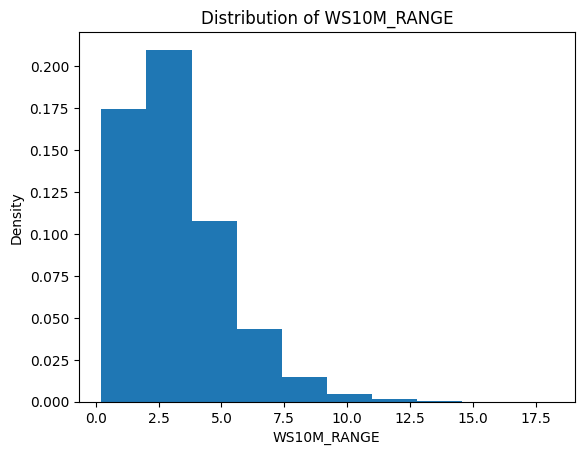

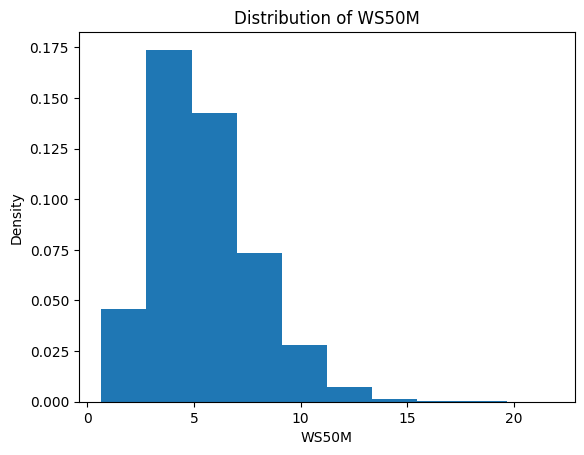

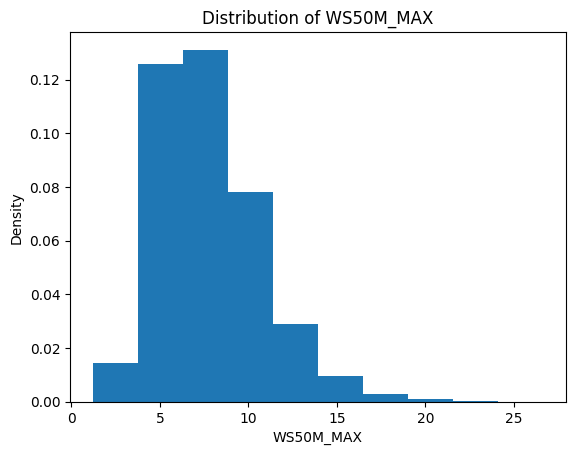

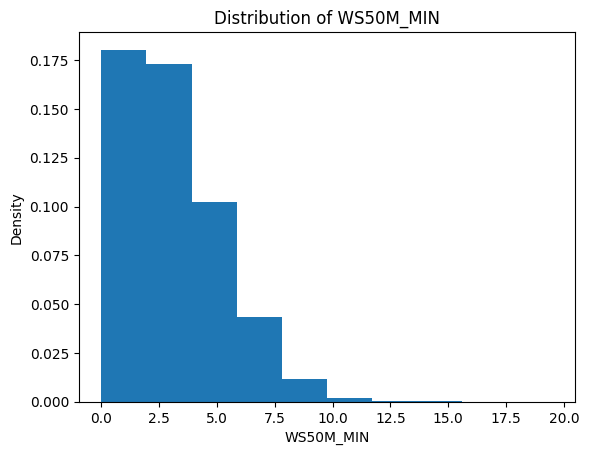

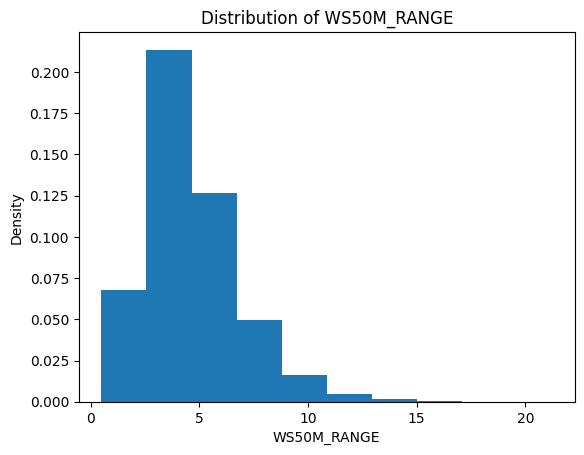

In [32]:
for col_name in measures_column_list:
    plt.figure()
    plt.hist(drought_df_measures[col_name], density = True)
    x_name = col_name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

# Outlier Treatment

# Identifying Outliers

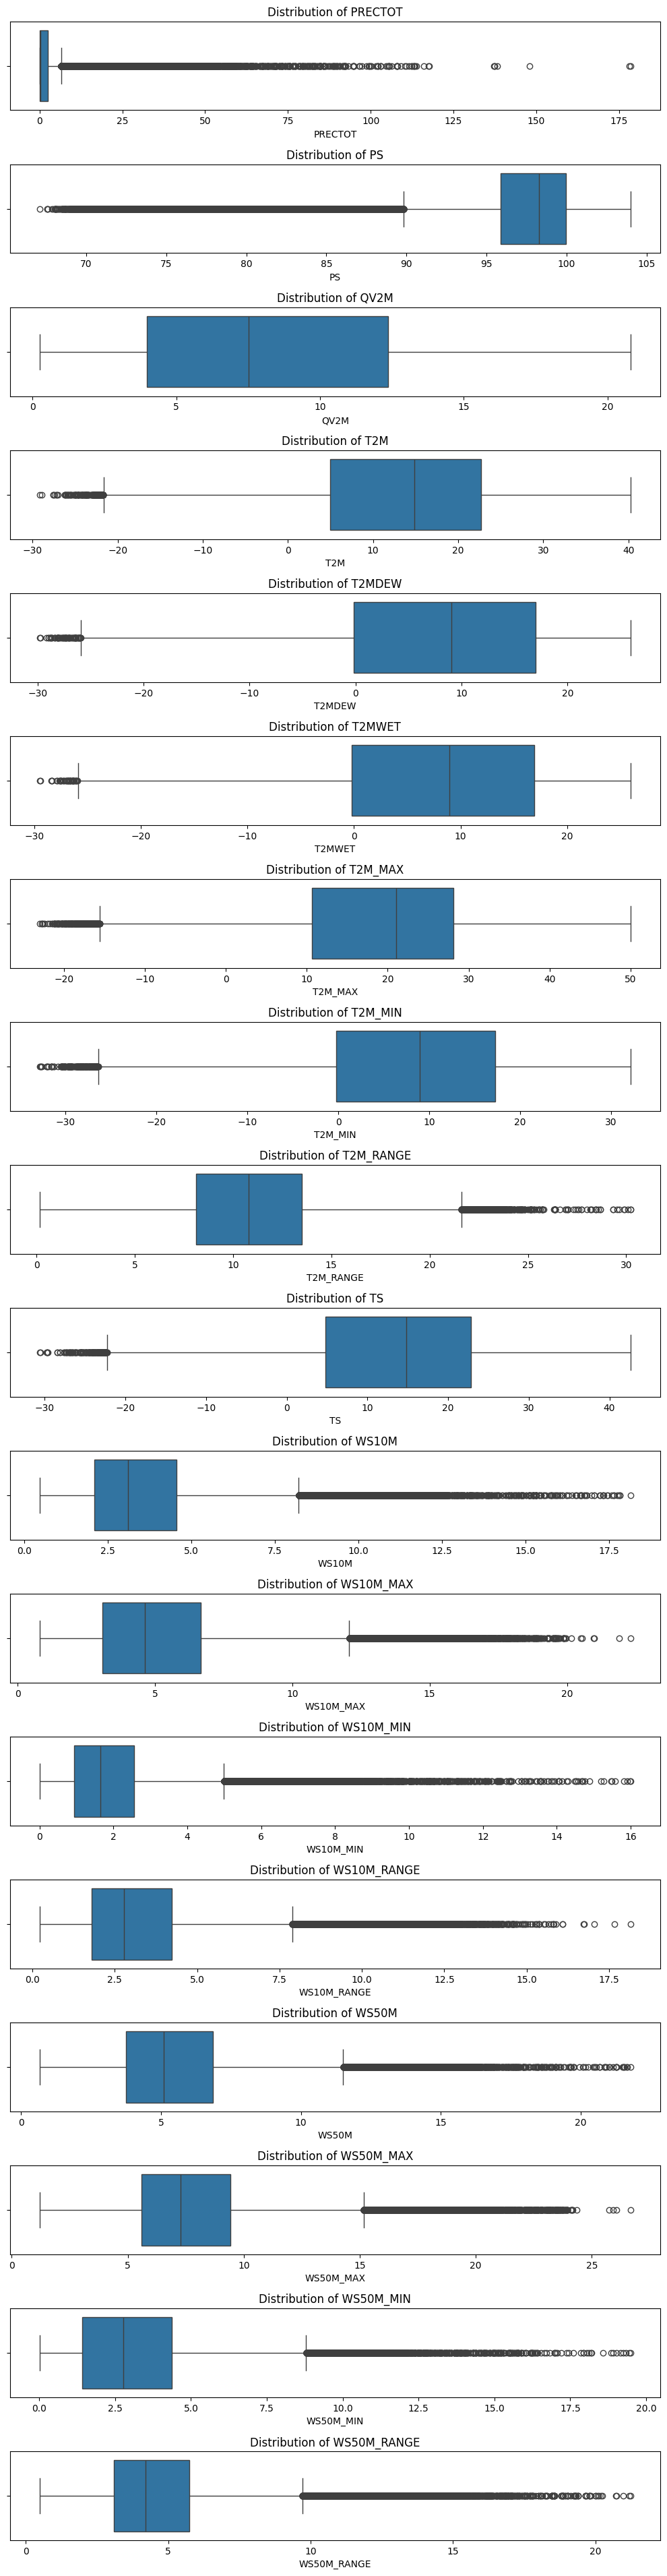

In [33]:
# Create a boxplot visualization for each column in the 'drought_df_measures' DataFrame.
# This code generates subplots in a single figure for each of the selected columns.
# Each subplot shows the distribution of values for a specific meteorological measure.

# Set the figure size for the entire plot.
plt.figure(figsize=(10, 40))

# Loop through the range of column indices (1 to 18) for the selected meteorological measures.
for x in range(1, 19):
    # Create a subplot in a grid of 19 rows and 1 column.
    plt.subplot(19, 1, x)

    # Generate a boxplot for the current column using Seaborn.
    sns.boxplot(x=drought_df_measures.columns[x - 1], data=drought_df_measures)

    # Get the name of the current column.
    x_name = drought_df_measures.columns[x - 1]

    # Set the title of the subplot to describe the distribution of the current meteorological measure.
    plt.title(f'Distribution of {x_name}')

# Adjust the layout of subplots for better visualization.
plt.tight_layout()


In [34]:
# Print the total number of rows in the 'drought_df_measures' DataFrame.
print('Total rows = ', len(drought_df_measures.index))

# Loop through numeric columns in the DataFrame and count the values beyond a standard outlier limit.
for i in drought_df_measures.select_dtypes(exclude=['object']).columns:
    print('Number of values beyond standard outlier limit in', i)

    # Calculate the number of values that are more than 3 standard deviations away from the mean.
    num_outliers = len(drought_df_measures[(drought_df_measures[i] > drought_df_measures[i].mean() + 3 * drought_df_measures[i].std()) | (drought_df_measures[i] < drought_df_measures[i].mean() - 3 * drought_df_measures[i].std())])
    print(num_outliers)


Total rows =  323232
Number of values beyond standard outlier limit in PRECTOT
7411
Number of values beyond standard outlier limit in PS
8586
Number of values beyond standard outlier limit in QV2M
0
Number of values beyond standard outlier limit in T2M
584
Number of values beyond standard outlier limit in T2MDEW
283
Number of values beyond standard outlier limit in T2MWET
182
Number of values beyond standard outlier limit in T2M_MAX
468
Number of values beyond standard outlier limit in T2M_MIN
620
Number of values beyond standard outlier limit in T2M_RANGE
428
Number of values beyond standard outlier limit in TS
570
Number of values beyond standard outlier limit in WS10M
3134
Number of values beyond standard outlier limit in WS10M_MAX
3086
Number of values beyond standard outlier limit in WS10M_MIN
4279
Number of values beyond standard outlier limit in WS10M_RANGE
4454
Number of values beyond standard outlier limit in WS50M
2624
Number of values beyond standard outlier limit in WS50M_M

# Removing values beyond the standard outlier limit

In [35]:
# Filter out outliers in each meteorological measure column by keeping only the values within 3 standard deviations from the mean.
# This process is applied to all the specified columns in the 'drought_df' DataFrame.

# Filter 'PRECTOT' column
drought_df = drought_df[(drought_df['PRECTOT'] <= drought_df['PRECTOT'].mean() + 3 * drought_df['PRECTOT'].std()) &
        (drought_df['PRECTOT'] >= drought_df['PRECTOT'].mean() - 3 * drought_df['PRECTOT'].std())]

# Filter 'PS' column
drought_df = drought_df[(drought_df['PS'] <= drought_df['PS'].mean() + 3 * drought_df['PS'].std()) &
        (drought_df['PS'] >= drought_df['PS'].mean() - 3 * drought_df['PS'].std())]

# Filter 'QV2M' column
drought_df = drought_df[(drought_df['QV2M'] <= drought_df['QV2M'].mean() + 3 * drought_df['QV2M'].std()) &
        (drought_df['QV2M'] >= drought_df['QV2M'].mean() - 3 * drought_df['QV2M'].std())]

# Filter 'T2M' column
drought_df = drought_df[(drought_df['T2M'] <= drought_df['T2M'].mean() + 3 * drought_df['T2M'].std()) &
        (drought_df['T2M'] >= drought_df['T2M'].mean() - 3 * drought_df['T2M'].std())]

# Filter 'T2MDEW' column
drought_df = drought_df[(drought_df['T2MDEW'] <= drought_df['T2MDEW'].mean() + 3 * drought_df['T2MDEW'].std()) &
        (drought_df['T2MDEW'] >= drought_df['T2MDEW'].mean() - 3 * drought_df['T2MDEW'].std())]

# Filter 'T2MWET' column
drought_df = drought_df[(drought_df['T2MWET'] <= drought_df['T2MWET'].mean() + 3 * drought_df['T2MWET'].std()) &
        (drought_df['T2MWET'] >= drought_df['T2MWET'].mean() - 3 * drought_df['T2MWET'].std())]

# Filter 'T2M_MAX' column
drought_df = drought_df[(drought_df['T2M_MAX'] <= drought_df['T2M_MAX'].mean() + 3 * drought_df['T2M_MAX'].std()) &
        (drought_df['T2M_MAX'] >= drought_df['T2M_MAX'].mean() - 3 * drought_df['T2M_MAX'].std())]

# Filter 'T2M_MIN' column
drought_df = drought_df[(drought_df['T2M_MIN'] <= drought_df['T2M_MIN'].mean() + 3 * drought_df['T2M_MIN'].std()) &
        (drought_df['T2M_MIN'] >= drought_df['T2M_MIN'].mean() - 3 * drought_df['T2M_MIN'].std())]

# Filter 'T2M_RANGE' column
drought_df = drought_df[(drought_df['T2M_RANGE'] <= drought_df['T2M_RANGE'].mean() + 3 * drought_df['T2M_RANGE'].std()) &
        (drought_df['T2M_RANGE'] >= drought_df['T2M_RANGE'].mean() - 3 * drought_df['T2M_RANGE'].std())]

# Filter 'TS' column
drought_df = drought_df[(drought_df['TS'] <= drought_df['TS'].mean() + 3 * drought_df['TS'].std()) &
        (drought_df['TS'] >= drought_df['TS'].mean() - 3 * drought_df['TS'].std())]

# Filter 'WS10M' column
drought_df = drought_df[(drought_df['WS10M'] <= drought_df['WS10M'].mean() + 3 * drought_df['WS10M'].std()) &
        (drought_df['WS10M'] >= drought_df['WS10M'].mean() - 3 * drought_df['WS10M'].std())]

# Filter 'WS10M_MAX' column
drought_df = drought_df[(drought_df['WS10M_MAX'] <= drought_df['WS10M_MAX'].mean() + 3 * drought_df['WS10M_MAX'].std()) &
        (drought_df['WS10M_MAX'] >= drought_df['WS10M_MAX'].mean() - 3 * drought_df['WS10M_MAX'].std())]

# Filter 'WS10M_MIN' column
drought_df = drought_df[(drought_df['WS10M_MIN'] <= drought_df['WS10M_MIN'].mean() + 3 * drought_df['WS10M_MIN'].std()) &
        (drought_df['WS10M_MIN'] >= drought_df['WS10M_MIN'].mean() - 3 * drought_df['WS10M_MIN'].std())]

# Filter 'WS10M_RANGE' column
drought_df = drought_df[(drought_df['WS10M_RANGE'] <= drought_df['WS10M_RANGE'].mean() + 3 * drought_df['WS10M_RANGE'].std()) &
        (drought_df['WS10M_RANGE'] >= drought_df['WS10M_RANGE'].mean() - 3 * drought_df['WS10M_RANGE'].std())]

# Filter 'WS50M' column
drought_df = drought_df[(drought_df['WS50M'] <= drought_df['WS50M'].mean() + 3 * drought_df['WS50M'].std()) &
        (drought_df['WS50M'] >= drought_df['WS50M'].mean() - 3 * drought_df['WS50M'].std())]

# Filter 'WS50M_MAX' column
drought_df = drought_df[(drought_df['WS50M_MAX'] <= drought_df['WS50M_MAX'].mean() + 3 * drought_df['WS50M_MAX'].std()) &
        (drought_df['WS50M_MAX'] >= drought_df['WS50M_MAX'].mean() - 3 * drought_df['WS50M_MAX'].std())]

# Filter 'WS50M_MIN' column
drought_df = drought_df[(drought_df['WS50M_MIN'] <= drought_df['WS50M_MIN'].mean() + 3*drought_df['WS50M_MIN'].std()) &
        (drought_df['WS50M_MIN'] >= drought_df['WS50M_MIN'].mean() - 3*drought_df['WS50M_MIN'].std())]

# Filter 'WS50M_RANGE'
drought_df = drought_df[(drought_df['WS50M_RANGE'] <= drought_df['WS50M_RANGE'].mean() + 3*drought_df['WS50M_RANGE'].std()) &
        (drought_df['WS50M_RANGE'] >= drought_df['WS50M_RANGE'].mean() - 3*drought_df['WS50M_RANGE'].std())]

print('Total rows = ',len(drought_df.index))

Total rows =  290258


# Univariate Analysis - Distribution of categorical variables

In [36]:
# Create a list called 'categorical_column_list' containing the names of specific columns representing categorical variables.
categorical_column_list = ['score', 'year', 'month', 'day']

# Create a new DataFrame 'drought_df_categorical' by selecting columns from 'drought_df' based on the 'categorical_column_list'.
drought_df_categorical = drought_df[categorical_column_list]

# 'drought_df_categorical' now contains only the specified categorical columns.


<Figure size 1000x4000 with 0 Axes>

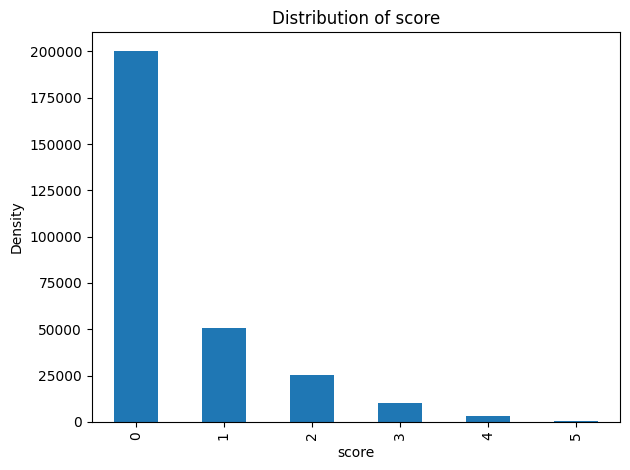

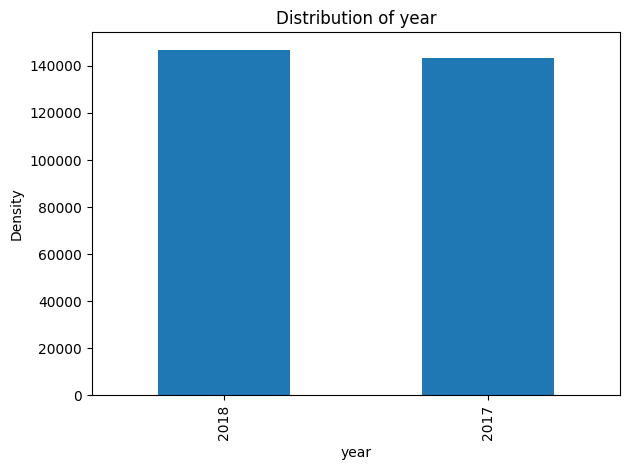

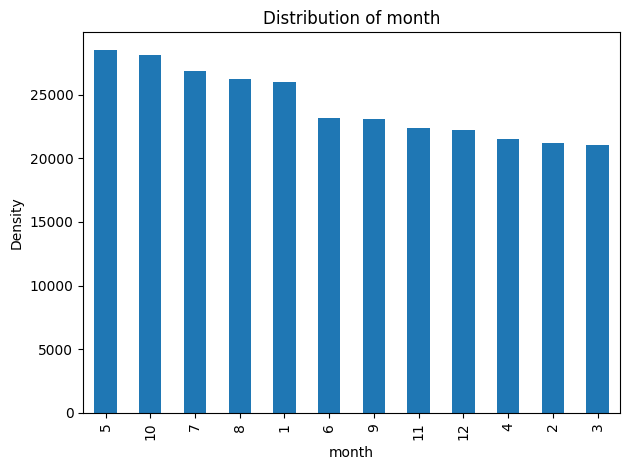

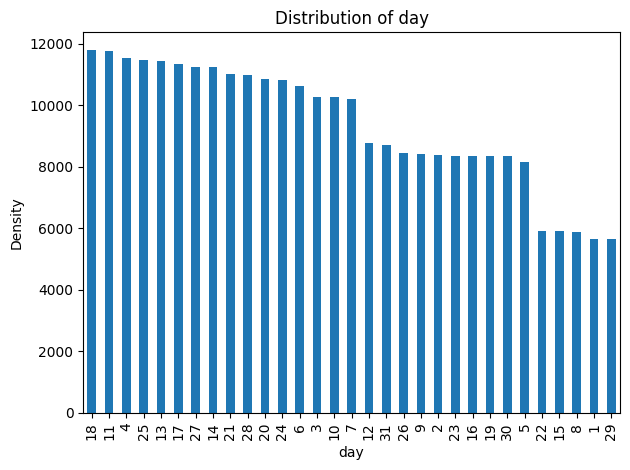

In [37]:
# Visualize the distribution of categorical variables in the 'drought_df_categorical' DataFrame.

# Set the figure size for the entire plot.
plt.figure(figsize=(10, 40))

# Iterate through the list of categorical column names.
for col_name in categorical_column_list:
    # Create a new figure for each categorical variable.
    plt.figure()

    # Create a bar plot to display the value counts of the current categorical variable.
    drought_df_categorical[col_name].value_counts().plot(kind='bar')

    # Define labels for the x and y axes.
    x_name = col_name
    y_name = 'Density'
    plt.xlabel(x_name)
    plt.ylabel(y_name)

    # Set the title of the plot to describe the distribution of the current categorical variable.
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

    # Adjust the layout for better visualization.
    plt.tight_layout()


# Bivariate Analysis

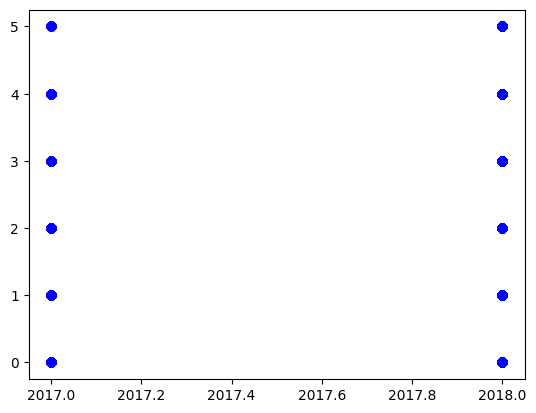

In [38]:
plt.scatter(drought_df['year'], drought_df['score'], c ="blue")
plt.show()

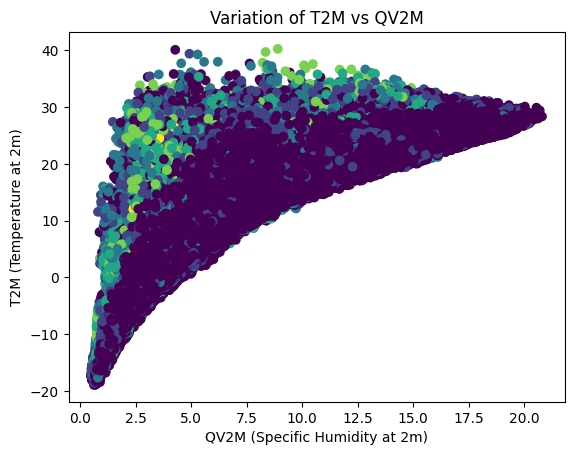

In [39]:
# Create a scatter plot to visualize the variation of 'T2M' (Temperature at 2 meters) against 'QV2M' (Specific Humidity at 2 meters).
# Color the data points by the 'score' variable to show the relationship between drought scores and meteorological variables.

# Scatter plot with 'QV2M' on the x-axis and 'T2M' on the y-axis.
plt.scatter(drought_df['QV2M'], drought_df['T2M'], c=drought_df['score'])

# Set labels for the x and y axes.
plt.xlabel('QV2M (Specific Humidity at 2m)')
plt.ylabel('T2M (Temperature at 2m)')

# Set the title of the plot.
plt.title('Variation of T2M vs QV2M')

# Show the scatter plot.
plt.show()


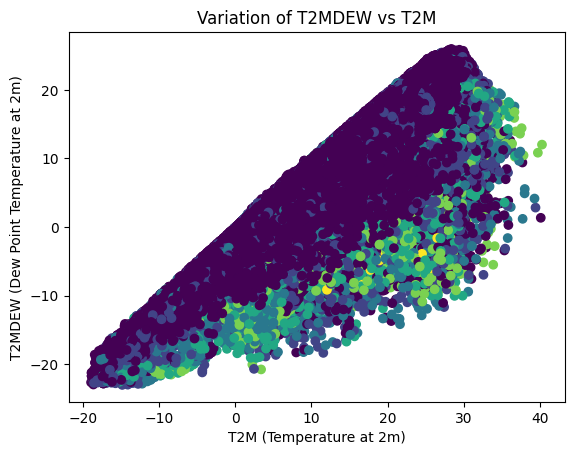

In [40]:
# Create a scatter plot to visualize the variation of 'T2MDEW' (Dew Point Temperature at 2 meters) against 'T2M' (Temperature at 2 meters).
# Color the data points by the 'score' variable to show the relationship between drought scores and meteorological variables.

# Scatter plot with 'T2M' on the x-axis and 'T2MDEW' on the y-axis.
plt.scatter(drought_df['T2M'], drought_df['T2MDEW'], c=drought_df['score'])

# Set labels for the x and y axes.
plt.xlabel('T2M (Temperature at 2m)')
plt.ylabel('T2MDEW (Dew Point Temperature at 2m)')

# Set the title of the plot.
plt.title('Variation of T2MDEW vs T2M')

# Show the scatter plot.
plt.show()


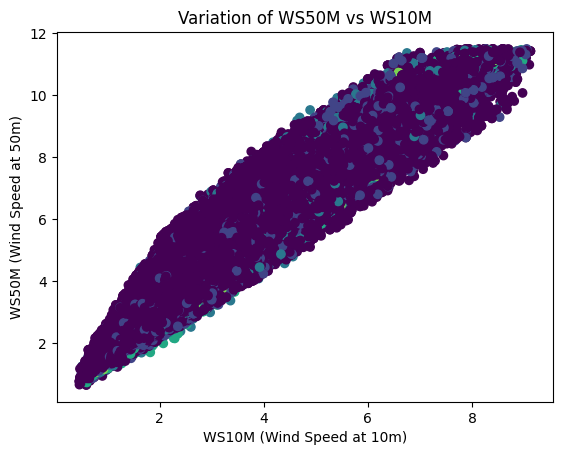

In [41]:
# Create a DataFrame 'temp_df' by filtering 'drought_df' to select rows where 'score' is equal to 5.

# Scatter plot to visualize the variation of 'WS50M' (Wind Speed at 50 meters) against 'WS10M' (Wind Speed at 10 meters).
# Color the data points by the 'score' variable to show the relationship between drought scores and meteorological variables.

# Scatter plot with 'WS10M' on the x-axis and 'WS50M' on the y-axis.
plt.scatter(drought_df['WS10M'], drought_df['WS50M'], c=drought_df['score'])

# Set labels for the x and y axes.
plt.xlabel('WS10M (Wind Speed at 10m)')
plt.ylabel('WS50M (Wind Speed at 50m)')

# Set the title of the plot.
plt.title('Variation of WS50M vs WS10M')

# Show the scatter plot.
plt.show()


# Extracting Dependent and Independent Variables

In [43]:
# Create a DataFrame 'independent_variables' by removing specific columns from 'drought_df'.
# The columns 'score', 'fips', and 'date' are dropped, leaving only the independent variables.

# Drop the 'score' column from 'drought_df'.
independent_variables = drought_df.drop('score', axis=1)

# Drop the 'fips' column from 'independent_variables'.
independent_variables = independent_variables.drop('fips', axis=1)

# # Drop the 'date' column from 'independent_variables'.
# independent_variables = independent_variables.drop('date', axis=1)

# Display the first few rows of 'independent_variables' to inspect the resulting DataFrame.
independent_variables.head()


,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,year,month,day
2,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,9.20,14.06,...,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2017,1,3
9,0.02,101.13,5.62,5.92,4.54,4.55,12.42,-2.37,14.79,5.81,...,4.24,2.52,1.72,6.19,7.55,4.68,2.86,2017,1,10
16,0.14,100.60,11.41,17.21,16.06,16.06,23.03,13.15,9.88,17.10,...,3.61,1.71,1.90,4.93,5.90,2.76,3.15,2017,1,17
23,0.00,99.72,5.60,9.27,5.34,5.35,16.23,4.18,12.06,8.95,...,2.34,1.03,1.31,3.52,6.49,1.47,5.02,2017,1,24
30,0.00,100.37,7.31,11.38,9.21,9.21,20.29,5.05,15.24,11.32,...,3.00,1.76,1.24,5.00,7.40,2.88,4.52,2017,1,31


In [44]:
# Create a Series 'target' by selecting the 'score' column from the 'drought_df' DataFrame.

# Select the 'score' column from 'drought_df' and store it in the 'target' Series.
target = drought_df['score']

# Display the first few values of the 'target' Series.
target.head()


2     2
9     2
16    2
23    1
30    1
Name: score, dtype: int32

# Correlation between independent variables for Feature Selection

In [45]:
# Calculate the correlation matrix for the meteorological measure columns in 'drought_df_measures'.

# Compute the correlation between different meteorological measures in the DataFrame and store it in 'correlation_plot'.
correlation_plot = drought_df_measures.corr()

# Create a styled correlation plot with a background gradient using the 'RdYlGn' colormap.
correlation_plot.style.background_gradient(cmap='RdYlGn')


,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
PRECTOT,1.000000,0.075066,0.252543,0.117199,0.239666,0.239594,0.052777,0.163004,-0.291579,0.114432,0.055413,0.066105,0.024380,0.072742,0.066776,0.075465,0.050503,0.051666
PS,0.075066,1.000000,0.296273,0.176457,0.348612,0.350046,0.123074,0.220429,-0.242698,0.175777,-0.058644,-0.111133,0.038380,-0.177430,-0.018691,-0.068333,0.054752,-0.144738
QV2M,0.252543,0.296273,1.000000,0.886326,0.958678,0.962647,0.825083,0.917417,-0.092736,0.879247,-0.269773,-0.291941,-0.156071,-0.287661,-0.253481,-0.293461,-0.123410,-0.272071
T2M,0.117199,0.176457,0.886326,1.000000,0.923373,0.923910,0.983894,0.982188,0.195577,0.997490,-0.253470,-0.254492,-0.175160,-0.223594,-0.242237,-0.251497,-0.153009,-0.187107
T2MDEW,0.239666,0.348612,0.958678,0.923373,1.000000,0.999637,0.870057,0.942678,-0.030031,0.915516,-0.275884,-0.294759,-0.161664,-0.287597,-0.241468,-0.276812,-0.120405,-0.252739
T2MWET,0.239594,0.350046,0.962647,0.923910,0.999637,1.000000,0.869884,0.944320,-0.035034,0.916134,-0.277705,-0.296700,-0.162964,-0.289329,-0.244257,-0.279821,-0.121985,-0.255221
T2M_MAX,0.052777,0.123074,0.825083,0.983894,0.870057,0.869884,1.000000,0.940070,0.358130,0.980753,-0.259819,-0.253759,-0.188276,-0.213490,-0.242448,-0.239363,-0.170316,-0.154010
T2M_MIN,0.163004,0.220429,0.917417,0.982188,0.942678,0.944320,0.940070,1.000000,0.018304,0.979668,-0.255568,-0.263873,-0.164834,-0.243493,-0.250381,-0.274457,-0.139092,-0.231374
T2M_RANGE,-0.291579,-0.242698,-0.092736,0.195577,-0.030031,-0.035034,0.358130,0.018304,1.000000,0.193269,-0.062051,-0.021539,-0.100717,0.040735,-0.025317,0.049655,-0.118542,0.181958
TS,0.114432,0.175777,0.879247,0.997490,0.915516,0.916134,0.980753,0.979668,0.193269,1.000000,-0.236799,-0.238306,-0.161228,-0.211312,-0.231650,-0.239979,-0.144387,-0.180113


#### Attributes QV2M,	T2M,	T2MDEW,	T2MWET,	T2M_MAX,	T2M_MIN and TS have shown strong positive correlation

#### Similary WS10M,	WS10M_MAX and	WS10M_MIN have shown a strong positve correlation

#### Likewise, WS50M,	WS50M_MAX and	WS50M_MIN	show strong positive correlation

#### However, from the scatter plots above, we see significant variance between the data points, despite the strong positive correlation. Hence we'll retain all these variables, and try other feature selection methods.

# Splitting into train and test

In [46]:
# Split the data into training and testing sets for machine learning modeling.

# 'independent_variables' contains the independent variables, and 'target' contains the target variable.

# Split the data into training and testing sets:
# - X_train: Training data for independent variables.
# - X_test: Testing data for independent variables.
# - y_train: Training data for the target variable.
# - y_test: Testing data for the target variable.

# The test set size is set to 20% of the total data, and 'random_state' is used for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)


In [47]:
independent_variables.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,year,month,day
2,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,9.20,14.06,...,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2017,1,3
9,0.02,101.13,5.62,5.92,4.54,4.55,12.42,-2.37,14.79,5.81,...,4.24,2.52,1.72,6.19,7.55,4.68,2.86,2017,1,10
16,0.14,100.60,11.41,17.21,16.06,16.06,23.03,13.15,9.88,17.10,...,3.61,1.71,1.90,4.93,5.90,2.76,3.15,2017,1,17
23,0.00,99.72,5.60,9.27,5.34,5.35,16.23,4.18,12.06,8.95,...,2.34,1.03,1.31,3.52,6.49,1.47,5.02,2017,1,24
30,0.00,100.37,7.31,11.38,9.21,9.21,20.29,5.05,15.24,11.32,...,3.00,1.76,1.24,5.00,7.40,2.88,4.52,2017,1,31


In [48]:
target

2          2
9          2
16         2
23         1
30         1
          ..
2268805    0
2268812    0
2268819    0
2268826    0
2268833    0
Name: score, Length: 290258, dtype: int32

In [49]:
print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

Train features shape (232206, 21)
Train target shape (232206,)
Test features shape (58052, 21)
Test target shape (58052,)


# Standardizing the data





In [50]:

# Standardize the features to have a mean of 0 and a standard deviation of 1 using StandardScaler.

# Create a StandardScaler object 'sc' to standardize the features.
sc = StandardScaler()
# Fit and transform the training data 'X_train' to standardize its features.
X_train = sc.fit_transform(X_train)

# Transform the testing data 'X_test' using the same scaling parameters as the training data.
X_test = sc.transform(X_test)

# Display the standardized 'X_train' data, where features have a mean of 0 and a standard deviation of 1.
X_train


array([[ 0.39320915, -0.23841562,  0.77740784, ..., -1.012376  ,
         0.72283385, -1.2660919 ],
       [ 0.0981732 , -0.13989716, -1.09898169, ...,  0.98777529,
        -1.04074905,  0.45176428],
       [ 0.25282914,  0.8956923 ,  2.22845528, ...,  0.98777529,
         0.72283385,  0.22271679],
       ...,
       [-0.5228299 ,  0.24272107, -0.84255536, ...,  0.98777529,
        -0.74681857,  0.90985926],
       [-0.5228299 , -1.81012882, -0.94634697, ..., -1.012376  ,
        -1.04074905,  0.56628803],
       [-0.41100176,  0.22210093,  1.08267729, ...,  0.98777529,
         0.72283385,  0.22271679]])

# Feature Selection using RFE and Random Forest algorithm

In [51]:
# Create a Random Forest Classifier model for feature selection using Recursive Feature Elimination (RFE).

# Create a Random Forest Classifier model with 10 decision trees as hyperparameters.
model = RandomForestClassifier(n_estimators=10)

# Use Recursive Feature Elimination (RFE) to select the top 15 features based on trial and error.
# RFE aims to find the most important features for prediction.
rfe = RFE(model, n_features_to_select=15)

# Fit the RFE model on the training data 'X_train' and target variable 'y_train'.
fit = rfe.fit(X_train, y_train)

# Print the number of selected features, a binary mask of selected features, and feature rankings.
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# Get the names of the selected features from the original independent variables.
selected_features = independent_variables.columns[(fit.get_support())]
print(selected_features)


Num Features: 15
Selected Features: [False  True  True  True  True  True  True  True  True  True  True False
 False  True  True  True False  True False False  True]
Feature Ranking: [3 1 1 1 1 1 1 1 1 1 1 5 6 1 1 1 4 1 7 2 1]
Index(['PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN',
       'T2M_RANGE', 'TS', 'WS10M', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX',
       'WS50M_RANGE', 'day'],
      dtype='object')


In [52]:
# Further feature selection and data splitting for machine learning modeling.

# Drop specific columns from 'independent_variables' DataFrame to refine feature selection.
independent_variables = independent_variables.drop(['PRECTOT', 'T2MWET', 'WS10M_MAX', 'WS10M_MIN', 'WS50M_MIN', 'month'], axis=1)

# Display the first few rows of the modified 'independent_variables' DataFrame.

# Split the data into training and testing sets after the feature selection.
X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

# Print the shapes of the training and testing feature sets as well as the target sets.
print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

# Standardize the features using StandardScaler as done previously.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Train features shape (232206, 15)
Train target shape (232206,)
Test features shape (58052, 15)
Test target shape (58052,)


In [53]:
independent_variables.head()

,PS,QV2M,T2M,T2MDEW,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_RANGE,year,day
2,99.69,9.74,14.24,13.44,18.48,9.29,9.20,14.06,2.25,2.09,4.80,7.27,4.72,2017,3
9,101.13,5.62,5.92,4.54,12.42,-2.37,14.79,5.81,3.22,1.72,6.19,7.55,2.86,2017,10
16,100.60,11.41,17.21,16.06,23.03,13.15,9.88,17.10,2.24,1.90,4.93,5.90,3.15,2017,17
23,99.72,5.60,9.27,5.34,16.23,4.18,12.06,8.95,1.82,1.31,3.52,6.49,5.02,2017,24
30,100.37,7.31,11.38,9.21,20.29,5.05,15.24,11.32,2.31,1.24,5.00,7.40,4.52,2017,31


# Fixing class imbalance

## Upsampling using SMOTE

In [54]:
# Apply Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance.

# Create a SMOTE (Synthetic Minority Over-sampling Technique) object with a random state of 5.
sm = SMOTE(random_state=5)

# Use SMOTE to over-sample the minority class in the training data.
X_train_ures_SMOTE, y_train_ures_SMOTE = sm.fit_resample(X_train, y_train.ravel())


In [55]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(X_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))
print("Counts of label '2' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 2),sum(y_train_ures_SMOTE == 2)))
print("Counts of label '3' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 3),sum(y_train_ures_SMOTE == 3)))
print("Counts of label '4' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 4),sum(y_train_ures_SMOTE == 4)))
print("Counts of label '5' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 5),sum(y_train_ures_SMOTE == 5)))

Before OverSampling, the shape of train_X: (232206, 15)
Before OverSampling, the shape of train_y: (232206,) 

After OverSampling, the shape of train_X: (961620, 15)
After OverSampling, the shape of train_y: (961620,) 

Counts of label '0' - Before Oversampling:160270, After OverSampling: 160270
Counts of label '1' - Before Oversampling:40424, After OverSampling: 160270
Counts of label '2' - Before Oversampling:20283, After OverSampling: 160270
Counts of label '3' - Before Oversampling:8266, After OverSampling: 160270
Counts of label '4' - Before Oversampling:2641, After OverSampling: 160270
Counts of label '5' - Before Oversampling:322, After OverSampling: 160270


# Downsampling using Neighborhood Cleaning Rule

In [56]:
# Apply Neighbourhood Cleaning Rule (NCR) to address class imbalance.

# Create a Neighbourhood Cleaning Rule (NCR) object with the specified parameters.
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)

# Use NCR to under-sample the majority class in the training data.
X_train_dres, y_train_dres = undersample.fit_resample(X_train, y_train)


In [57]:
print('Before UnderSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(X_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres == 5)))

Before UnderSampling, the shape of train_X: (232206, 15)
Before UnderSampling, the shape of train_y: (232206,) 

After UnderSampling, the shape of train_X: (189015, 15)
After UnderSampling, the shape of train_y: (189015,) 

Counts of label '0' - Before UnderSampling:160270, After UnderSampling: 151072
Counts of label '1' - Before UnderSampling:40424, After UnderSampling: 22945
Counts of label '2' - Before UnderSampling:20283, After UnderSampling: 9887
Counts of label '3' - Before UnderSampling:8266, After UnderSampling: 3661
Counts of label '4' - Before UnderSampling:2641, After UnderSampling: 1128
Counts of label '5' - Before UnderSampling:322, After UnderSampling: 322


# Downsampling using Near Miss

In [58]:
# Apply NearMiss algorithm to address class imbalance.

# Create a NearMiss object to under-sample the majority class in the training data.
undersample = NearMiss()

# Use NearMiss to under-sample the majority class in the training data, improving class balance.
X_train_dres_nm, y_train_dres_nm = undersample.fit_resample(X_train, y_train)


In [59]:
print('Before UnderSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(X_train_dres_nm.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres_nm.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres_nm == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres_nm == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres_nm == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres_nm == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres_nm == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres_nm == 5)))

Before UnderSampling, the shape of train_X: (232206, 15)
Before UnderSampling, the shape of train_y: (232206,) 

After UnderSampling, the shape of train_X: (1932, 15)
After UnderSampling, the shape of train_y: (1932,) 

Counts of label '0' - Before UnderSampling:160270, After UnderSampling: 322
Counts of label '1' - Before UnderSampling:40424, After UnderSampling: 322
Counts of label '2' - Before UnderSampling:20283, After UnderSampling: 322
Counts of label '3' - Before UnderSampling:8266, After UnderSampling: 322
Counts of label '4' - Before UnderSampling:2641, After UnderSampling: 322
Counts of label '5' - Before UnderSampling:322, After UnderSampling: 322


# PCA for dimensionality reduction

## PCA on Near miss Downsampled Data

In [60]:
# Apply Principal Component Analysis (PCA) for dimensionality reduction.

# Create a PCA (Principal Component Analysis) object.
pca = PCA()

# Fit and transform the training data 'X_train_dres_nm' to reduce its dimensionality.
X_train_dres_nm_PCAreduced = pca.fit_transform(X_train_dres_nm)

# Transform the testing data 'X_test' using the same PCA transformation.
X_test_NM_PCA_transformed = pca.transform(X_test)


In [61]:
print(pca.explained_variance_ratio_)

[3.82907178e-01 2.03870289e-01 1.49675998e-01 8.18362296e-02
 6.36296307e-02 4.86093615e-02 4.25422548e-02 1.21083286e-02
 1.02378557e-02 2.21781465e-03 1.04973193e-03 8.73285307e-04
 3.74646056e-04 6.73856908e-05 1.00681500e-08]


In [62]:
# Select the number of principal components that explain more than 90% of the variance.

# Create a PCA (Principal Component Analysis) object with 'n_components' set to 5.
pca = PCA(n_components=5)

# Fit and transform the training data 'X_train_dres_nm' to reduce its dimensionality.
X_train_dres_nm_PCAreduced = pca.fit_transform(X_train_dres_nm)

# Transform the testing data 'X_test' using the same PCA transformation.
X_test_NM_PCA_transformed = pca.transform(X_test)


In [63]:
print(pca.explained_variance_ratio_)

[0.38290718 0.20387029 0.149676   0.08183623 0.06362963]


# PCA on SMOTE Upsampled Data

In [64]:
# Apply Principal Component Analysis (PCA) for dimensionality reduction.

# Create a PCA (Principal Component Analysis) object.
pca = PCA()

# Fit and transform the over-sampled training data 'X_train_ures_SMOTE' to reduce its dimensionality.
X_train_ures_SMOTE_PCAreduced = pca.fit_transform(X_train_ures_SMOTE)

# Transform the testing data 'X_test' using the same PCA transformation.
X_test_SMOTE_PCA_transformed = pca.transform(X_test)


In [65]:
print(pca.explained_variance_ratio_)

[3.39546034e-01 2.59765409e-01 1.39139105e-01 6.58261036e-02
 6.26807805e-02 5.35057775e-02 5.19144040e-02 1.27735958e-02
 9.28721524e-03 2.39199371e-03 1.70518075e-03 1.01861847e-03
 3.79262902e-04 6.65138704e-05 5.12335148e-09]


In [66]:
# choosing n value that explains >90% variance
pca = PCA(n_components=5)
X_train_ures_SMOTE_PCAreduced = pca.fit_transform(X_train_ures_SMOTE)
X_test_SMOTE_PCA_transformed = pca.transform(X_test)

In [67]:
print(pca.explained_variance_ratio_)

[0.33954603 0.25976541 0.1391391  0.0658261  0.06268078]


# LDA For Dimensionality Reduction

## LDA on Near Miss Downsampled Data

In [68]:
# Apply Linear Discriminant Analysis (LDA) for dimensionality reduction.

# Create an LDA (Linear Discriminant Analysis) object with 'n_components' set to 5.
lda = LDA(n_components=5)

# Fit and transform the under-sampled training data 'X_train_dres_nm' using LDA to reduce its dimensionality.
X_train_dres_nm_LDAreduced = lda.fit_transform(X_train_dres_nm, y_train_dres_nm)

# Transform the testing data 'X_test' using the same LDA transformation.
X_test_NM_LDA_transformed = lda.transform(X_test)


In [69]:
print("Train features shape", X_train.shape)
print("LDA Dimensionality reduced features shape on Near Miss downsampled data", X_train_dres_nm_LDAreduced.shape)
print("LDA Dimensionality reduced features shape on test data", X_test_NM_LDA_transformed.shape)

Train features shape (232206, 15)
LDA Dimensionality reduced features shape on Near Miss downsampled data (1932, 5)
LDA Dimensionality reduced features shape on test data (58052, 5)


## LDA on SMOTE Upsampled Data

In [70]:
# Apply Linear Discriminant Analysis (LDA) for dimensionality reduction.

# Create an LDA (Linear Discriminant Analysis) object with 'n_components' set to 5.
lda = LDA(n_components=5)

# Fit and transform the over-sampled training data 'X_train_ures_SMOTE' using LDA to reduce its dimensionality.
X_train_ures_SMOTE_LDAreduced = lda.fit_transform(X_train_ures_SMOTE, y_train_ures_SMOTE)

# Transform the testing data 'X_test' using the same LDA transformation.
X_test_SMOTE_LDA_transformed = lda.transform(X_test)


In [71]:
print("Train features shape", X_train.shape)
print("LDA Dimensionality reduced features shape on SMOTE Upsampled data", X_train_ures_SMOTE_LDAreduced.shape)
print("LDA Dimensionality reduced features shape on test data", X_test_NM_LDA_transformed.shape)

Train features shape (232206, 15)
LDA Dimensionality reduced features shape on SMOTE Upsampled data (961620, 5)
LDA Dimensionality reduced features shape on test data (58052, 5)


# Model Development

## Decision Tree Algorithm with Near Miss Downsampling

In [72]:
# Create and train a Decision Tree Classifier for classification using under-sampled data.

# Create a Decision Tree Classifier with 'gini' as the criterion for splitting nodes.
DT_classifier_NM = tree.DecisionTreeClassifier(criterion='gini')

# Fit the Decision Tree Classifier on the under-sampled training data 'X_train_dres_nm' and corresponding labels 'y_train_dres_nm'.
DT_classifier_NM.fit(X_train_dres_nm, y_train_dres_nm)

# Use the trained classifier to make predictions on the testing data 'X_test'.
y_pred_NM = DT_classifier_NM.predict(X_test)


In [73]:
print('Performance of Decision Tree Algorithm with Near Miss Downsampling:\n')
print(confusion_matrix(y_test, y_pred_NM))
print(classification_report(y_test, y_pred_NM))
print('Accuracy:',accuracy_score(y_test, y_pred_NM))
print('Precision:',precision_score(y_test, y_pred_NM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM))

Performance of Decision Tree Algorithm with Near Miss Downsampling:

[[ 3978 12190  6817  6806  2700  7556]
 [  802  2708  1874  1651   789  2321]
 [  265  1292   853   836   427  1285]
 [   95   496   320   407   229   600]
 [   29   126    86   122   116   177]
 [    2     5     9    11    23    49]]
              precision    recall  f1-score   support

           0       0.77      0.10      0.18     40047
           1       0.16      0.27      0.20     10145
           2       0.09      0.17      0.11      4958
           3       0.04      0.19      0.07      2147
           4       0.03      0.18      0.05       656
           5       0.00      0.49      0.01        99

    accuracy                           0.14     58052
   macro avg       0.18      0.23      0.10     58052
weighted avg       0.57      0.14      0.17     58052

Accuracy: 0.13971956177220424
Precision: 0.5679922281755417
Recall: 0.13971956177220424
F1 Score: 0.16930638522636376
Cohen Kappa Score: 0.00640297833446

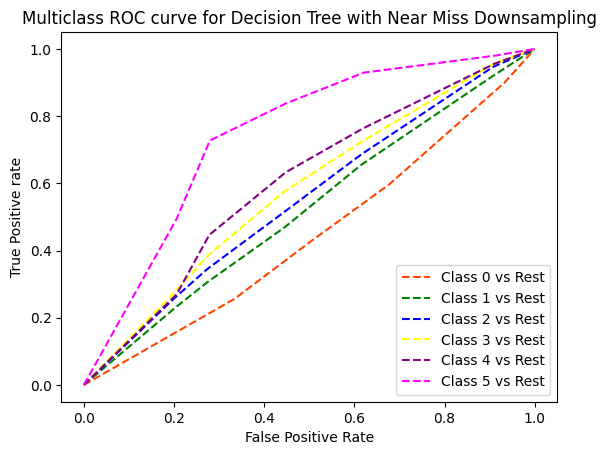

In [74]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NM, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling',dpi=300)

## Decision Tree Algorithm with SMOTE Upsampling

In [75]:
DT_classifier_SMOTE = tree.DecisionTreeClassifier(criterion='gini', max_depth=70)
DT_classifier_SMOTE.fit(X_train_ures_SMOTE,y_train_ures_SMOTE)
y_pred_SMOTE = DT_classifier_SMOTE.predict(X_test)

In [76]:
print('Performance of Decision Tree Algorithm with SMOTE Upsampling:\n')
print(confusion_matrix(y_test, y_pred_SMOTE))
print(classification_report(y_test, y_pred_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_pred_SMOTE))
print('Precision:',precision_score(y_test, y_pred_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_SMOTE))

Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[34487  3562  1271   493   195    39]
 [ 2563  5790  1393   286    98    15]
 [  498  1182  2643   534    91    10]
 [  136   190   506  1099   203    13]
 [   26    38    65   194   312    21]
 [    6     1    12    19    31    30]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89     40047
           1       0.54      0.57      0.55     10145
           2       0.45      0.53      0.49      4958
           3       0.42      0.51      0.46      2147
           4       0.34      0.48      0.39       656
           5       0.23      0.30      0.26        99

    accuracy                           0.76     58052
   macro avg       0.48      0.54      0.51     58052
weighted avg       0.78      0.76      0.77     58052

Accuracy: 0.7641597188727348
Precision: 0.7827968692739552
Recall: 0.7641597188727348
F1 Score: 0.7722169819152113
Cohen Kappa Score: 0.5365575763921304


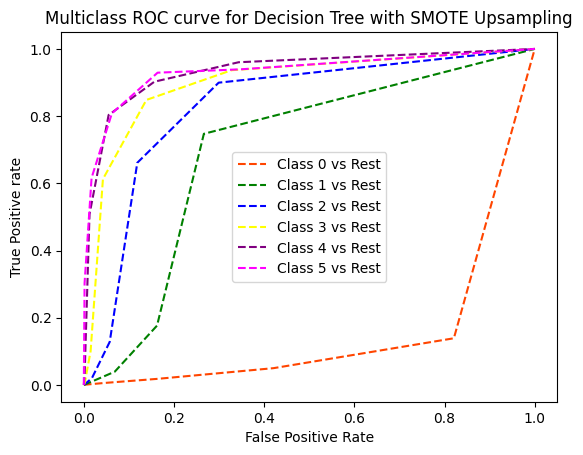

In [77]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_SMOTE, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE Upsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE Upsampling',dpi=300)

## Decision Tree Algorithm with Near Miss Downsampling and PCA

In [78]:
DT_classifier_NM_PCA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_NM_PCA.fit(X_train_dres_nm_PCAreduced,y_train_dres_nm)
y_pred_NM_PCA = DT_classifier_NM_PCA.predict(X_test_NM_PCA_transformed)

In [79]:
print('Performance of Decision Tree Algorithm with Near Miss Downsampling and PCA:\n')
print(confusion_matrix(y_test, y_pred_NM_PCA))
print(confusion_matrix(y_test, y_pred_NM_PCA))
print(classification_report(y_test, y_pred_NM_PCA))
print('Accuracy:',accuracy_score(y_test, y_pred_NM_PCA))
print('Precision:',precision_score(y_test, y_pred_NM_PCA, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM_PCA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM_PCA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM_PCA))

Performance of Decision Tree Algorithm with Near Miss Downsampling and PCA:

[[ 6765  8553 10049  6266  4012  4402]
 [ 1619  2383  1859  1739  1140  1405]
 [  860  1075   828   866   557   772]
 [  345   432   307   371   277   415]
 [   67   105    76   118   121   169]
 [    7    10     7    11    21    43]]
[[ 6765  8553 10049  6266  4012  4402]
 [ 1619  2383  1859  1739  1140  1405]
 [  860  1075   828   866   557   772]
 [  345   432   307   371   277   415]
 [   67   105    76   118   121   169]
 [    7    10     7    11    21    43]]
              precision    recall  f1-score   support

           0       0.70      0.17      0.27     40047
           1       0.19      0.23      0.21     10145
           2       0.06      0.17      0.09      4958
           3       0.04      0.17      0.06      2147
           4       0.02      0.18      0.04       656
           5       0.01      0.43      0.01        99

    accuracy                           0.18     58052
   macro avg       

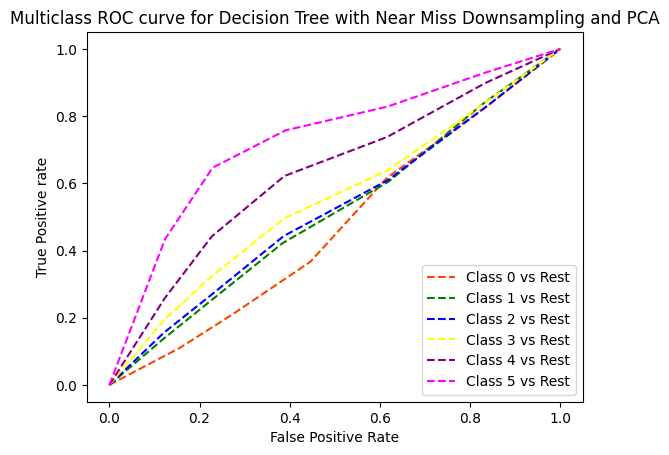

In [80]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NM_PCA, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and PCA',dpi=300)

## Decision Tree Algorithm with SMOTE Upsampling and PCA

In [81]:
DT_classifier_SMOTE_PCA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_SMOTE_PCA.fit(X_train_ures_SMOTE_PCAreduced,y_train_ures_SMOTE)
y_pred_SMOTE_PCA = DT_classifier_SMOTE_PCA.predict(X_test_SMOTE_PCA_transformed)

In [82]:
print('Performance of Decision Tree Algorithm with SMOTE Upsampling and PCA:\n')
print(confusion_matrix(y_test, y_pred_SMOTE_PCA))
print(confusion_matrix(y_test, y_pred_SMOTE_PCA))
print(classification_report(y_test, y_pred_SMOTE_PCA))
print('Accuracy:',accuracy_score(y_test, y_pred_SMOTE_PCA))
print('Precision:',precision_score(y_test, y_pred_SMOTE_PCA, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_SMOTE_PCA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_SMOTE_PCA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_SMOTE_PCA))

Performance of Decision Tree Algorithm with SMOTE Upsampling and PCA:

[[32550  4183  1914   968   353    79]
 [ 2706  5386  1483   399   142    29]
 [  669  1194  2409   573    98    15]
 [  251   185   518   963   212    18]
 [   54    39    68   196   262    37]
 [    7     6     9    15    27    35]]
[[32550  4183  1914   968   353    79]
 [ 2706  5386  1483   399   142    29]
 [  669  1194  2409   573    98    15]
 [  251   185   518   963   212    18]
 [   54    39    68   196   262    37]
 [    7     6     9    15    27    35]]


              precision    recall  f1-score   support

           0       0.90      0.81      0.85     40047
           1       0.49      0.53      0.51     10145
           2       0.38      0.49      0.42      4958
           3       0.31      0.45      0.37      2147
           4       0.24      0.40      0.30       656
           5       0.16      0.35      0.22        99

    accuracy                           0.72     58052
   macro avg       0.41      0.51      0.45     58052
weighted avg       0.75      0.72      0.73     58052

Accuracy: 0.7166850409977262
Precision: 0.7518453736024666
Recall: 0.7166850409977262
F1 Score: 0.7312967473325982
Cohen Kappa Score: 0.46001633840096634


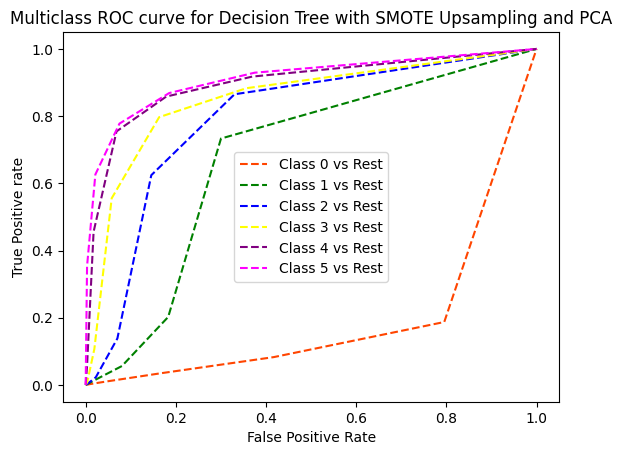

In [83]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_SMOTE_PCA, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and PCA',dpi=300)

## Decision Tree Algorithm with Near Miss Downsampling and LDA

In [84]:
DT_classifier_NM_LDA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_NM_LDA.fit(X_train_dres_nm_LDAreduced,y_train_dres_nm)
y_pred_NM_LDA = DT_classifier_NM_LDA.predict(X_test_NM_LDA_transformed)

In [85]:
print('Performance of Decision Tree Algorithm with Near Miss Downsampling and LDA:\n')
print(confusion_matrix(y_test, y_pred_NM_LDA))
print(confusion_matrix(y_test, y_pred_NM_LDA))
print(classification_report(y_test, y_pred_NM_LDA))
print('Accuracy:',accuracy_score(y_test, y_pred_NM_LDA))
print('Precision:',precision_score(y_test, y_pred_NM_LDA, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM_LDA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM_LDA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM_LDA))

Performance of Decision Tree Algorithm with Near Miss Downsampling and LDA:

[[9422 9448 5236 4236 4486 7219]
 [1908 2244 1348 1194 1413 2038]
 [ 862  996  714  634  766  986]
 [ 308  368  310  358  344  459]
 [  75   79   77  115  154  156]
 [   9    5    7   14   28   36]]
[[9422 9448 5236 4236 4486 7219]
 [1908 2244 1348 1194 1413 2038]
 [ 862  996  714  634  766  986]
 [ 308  368  310  358  344  459]
 [  75   79   77  115  154  156]
 [   9    5    7   14   28   36]]


              precision    recall  f1-score   support

           0       0.75      0.24      0.36     40047
           1       0.17      0.22      0.19     10145
           2       0.09      0.14      0.11      4958
           3       0.05      0.17      0.08      2147
           4       0.02      0.23      0.04       656
           5       0.00      0.36      0.01        99

    accuracy                           0.22     58052
   macro avg       0.18      0.23      0.13     58052
weighted avg       0.56      0.22      0.29     58052

Accuracy: 0.22269689244125956
Precision: 0.5565489989039338
Recall: 0.22269689244125956
F1 Score: 0.29381611161372356
Cohen Kappa Score: 0.020652826937439972


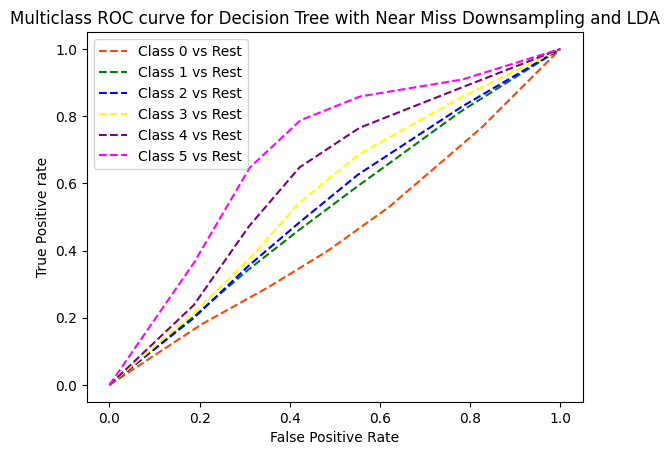

In [86]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NM_LDA, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and LDA',dpi=300)

## Decision Tree Algorithm with SMOTE Upsampling and LDA

In [87]:
DT_classifier_SMOTE_LDA = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_SMOTE_LDA.fit(X_train_ures_SMOTE_LDAreduced,y_train_ures_SMOTE)
y_pred_SMOTE_LDA = DT_classifier_SMOTE_LDA.predict(X_test_SMOTE_LDA_transformed)

In [88]:
print('Performance of Decision Tree Algorithm with SMOTE Upsampling and LDA:\n')
print(confusion_matrix(y_test, y_pred_SMOTE_LDA))
print(confusion_matrix(y_test, y_pred_SMOTE_LDA))
print(classification_report(y_test, y_pred_SMOTE_LDA))
print('Accuracy:',accuracy_score(y_test, y_pred_SMOTE_LDA))
print('Precision:',precision_score(y_test, y_pred_SMOTE_LDA, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_SMOTE_LDA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_SMOTE_LDA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_SMOTE_LDA))

Performance of Decision Tree Algorithm with SMOTE Upsampling and LDA:

[[29742  5177  2914  1537   576   101]
 [ 2655  5065  1570   577   230    48]
 [  737  1208  2196   589   190    38]
 [  249   280   505   869   217    27]
 [   55    67    88   180   247    19]
 [   15     9    12    20    33    10]]
[[29742  5177  2914  1537   576   101]
 [ 2655  5065  1570   577   230    48]
 [  737  1208  2196   589   190    38]
 [  249   280   505   869   217    27]
 [   55    67    88   180   247    19]
 [   15     9    12    20    33    10]]


              precision    recall  f1-score   support

           0       0.89      0.74      0.81     40047
           1       0.43      0.50      0.46     10145
           2       0.30      0.44      0.36      4958
           3       0.23      0.40      0.29      2147
           4       0.17      0.38      0.23       656
           5       0.04      0.10      0.06        99

    accuracy                           0.66     58052
   macro avg       0.34      0.43      0.37     58052
weighted avg       0.72      0.66      0.68     58052

Accuracy: 0.6568076896575484
Precision: 0.724500323412941
Recall: 0.6568076896575484
F1 Score: 0.6831400194504871
Cohen Kappa Score: 0.37997144432280794


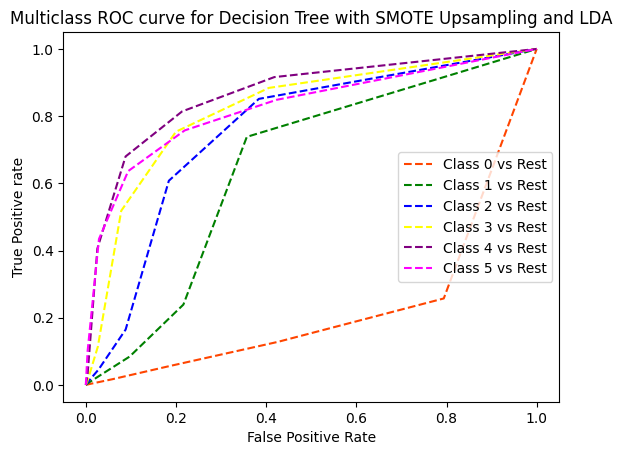

In [89]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_SMOTE_LDA, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and LDA',dpi=300)

## Decision Tree Algorithm withot resampling

In [90]:
DT_classifier = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier.fit(X_train,y_train)
y_pred_DT = DT_classifier.predict(X_test)

In [91]:
print('Performance of Decision Tree Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))
print('Accuracy:',accuracy_score(y_test, y_pred_DT))
print('Precision:',precision_score(y_test, y_pred_DT, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_DT, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_DT, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_DT))

Performance of Decision Tree Algorithm without resampling:

[[36124  2818   753   270    68    14]
 [ 3333  5387  1170   203    45     7]
 [  785  1258  2354   488    67     6]
 [  272   244   563   899   162     7]
 [   68    47    80   187   253    21]
 [   11     6    14    17    29    22]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90     40047
           1       0.55      0.53      0.54     10145
           2       0.48      0.47      0.48      4958
           3       0.44      0.42      0.43      2147
           4       0.41      0.39      0.40       656
           5       0.29      0.22      0.25        99

    accuracy                           0.78     58052
   macro avg       0.51      0.49      0.50     58052
weighted avg       0.77      0.78      0.77     58052

Accuracy: 0.7758389030524357
Precision: 0.7722812695780119
Recall: 0.7758389030524357
F1 Score: 0.7739804126863281
Cohen Kappa Score: 0.5325538037590042


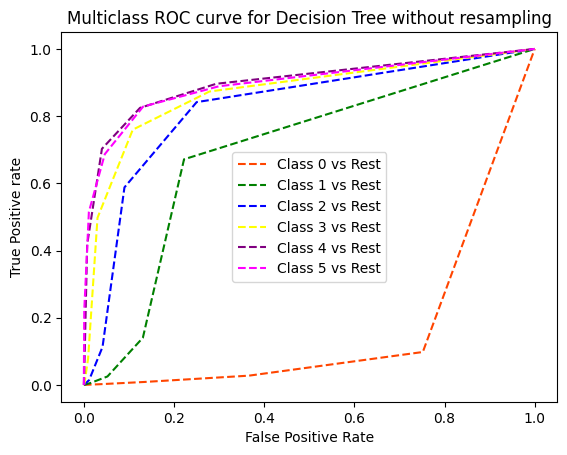

In [92]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_DT, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree without resampling',dpi=300)

## Decision Tree Algorithm without resampling  - Hyperparameter Tuning

In [93]:
DT_classifier.get_depth()

41

In [94]:
params = {
          'max_depth': [40, 50, 60, 70, 80],
#           'max_samples_leaf': [, 20, 50, 100],
          'max_features':['log2','sqrt',None]
}

In [95]:
grid_search = GridSearchCV(estimator=DT_classifier,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [96]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


CPU times: total: 22.5 s
Wall time: 1min 44s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [40, 50, 60, 70, 80],
                         'max_features': ['log2', 'sqrt', None]},
             scoring='accuracy', verbose=1)

In [97]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
14,16.272366,0.165849,0.059153,0.006748,80,None,"{'max_depth': 80, 'max_features': None}",0.755306,0.756908,0.755715,0.758023,0.756488,0.001064,1
2,18.224221,0.184478,0.064235,0.008413,40,None,"{'max_depth': 40, 'max_features': None}",0.756270,0.757528,0.756163,0.755525,0.756371,0.000726,2
11,18.434086,0.211309,0.069677,0.011828,70,None,"{'max_depth': 70, 'max_features': None}",0.755960,0.757183,0.755456,0.756214,0.756204,0.000628,3
8,18.627293,0.173677,0.067811,0.013079,60,None,"{'max_depth': 60, 'max_features': None}",0.754927,0.756339,0.755301,0.757575,0.756036,0.001029,4
5,17.652912,0.585428,0.074943,0.015072,50,None,"{'max_depth': 50, 'max_features': None}",0.754858,0.758079,0.755060,0.756008,0.756001,0.001276,5


## Decision Tree Algorithm without resampling - Setting the right hyperparameters

In [98]:
DT_classifier = tree.DecisionTreeClassifier(criterion='gini', max_depth=70)
DT_classifier.fit(X_train,y_train)
y_pred_DT = DT_classifier.predict(X_test)

In [99]:
print('Performance of Decision Tree Algorithm without resampling - After Hyperparameter Tuning:\n')
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))
print('Accuracy:',accuracy_score(y_test, y_pred_DT))
print('Precision:',precision_score(y_test, y_pred_DT, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_DT, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_DT, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_DT))

Performance of Decision Tree Algorithm without resampling - After Hyperparameter Tuning:

[[36088  2852   749   268    74    16]
 [ 3341  5396  1144   211    48     5]
 [  776  1272  2343   499    61     7]
 [  274   237   572   893   164     7]
 [   66    48    80   190   249    23]
 [   10     9    11    21    29    19]]


              precision    recall  f1-score   support

           0       0.89      0.90      0.90     40047
           1       0.55      0.53      0.54     10145
           2       0.48      0.47      0.48      4958
           3       0.43      0.42      0.42      2147
           4       0.40      0.38      0.39       656
           5       0.25      0.19      0.22        99

    accuracy                           0.77     58052
   macro avg       0.50      0.48      0.49     58052
weighted avg       0.77      0.77      0.77     58052

Accuracy: 0.7749603803486529
Precision: 0.7715810480259457
Recall: 0.7749603803486529
F1 Score: 0.7732066158677179
Cohen Kappa Score: 0.5310433828354734


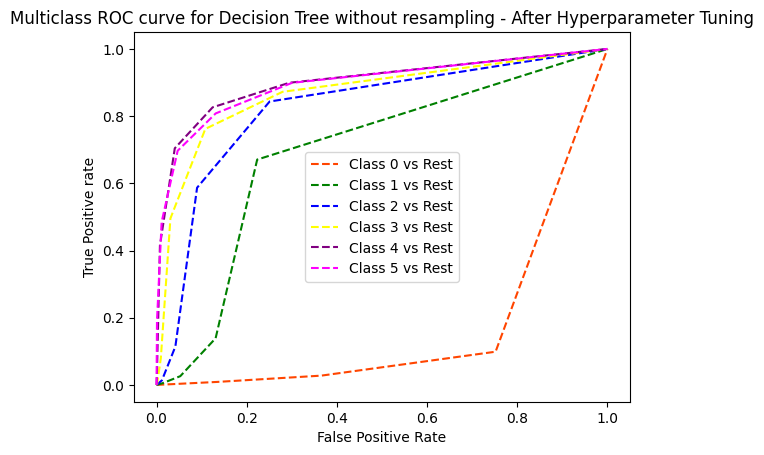

In [100]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_DT, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree without resampling - After Hyperparameter Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree without resampling - After Hyperparameter Tuning',dpi=300)

# KNN Algorithm without resampling

In [101]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [102]:
print('Performance of KNN Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

Performance of KNN Algorithm without resampling:

[[37750  1914   312    51    19     1]
 [ 4032  5149   861    87    14     2]
 [ 1093  1386  2112   337    29     1]
 [  354   274   540   886    92     1]
 [   63    53    82   201   250     7]
 [   21     4     9    18    33    14]]


              precision    recall  f1-score   support

           0       0.87      0.94      0.91     40047
           1       0.59      0.51      0.54     10145
           2       0.54      0.43      0.48      4958
           3       0.56      0.41      0.48      2147
           4       0.57      0.38      0.46       656
           5       0.54      0.14      0.22        99

    accuracy                           0.80     58052
   macro avg       0.61      0.47      0.51     58052
weighted avg       0.78      0.80      0.78     58052

Accuracy: 0.7951664025356577
Precision: 0.7779145798038541
Recall: 0.7951664025356577
F1 Score: 0.7836837362908408
Cohen Kappa Score: 0.5468441426559051


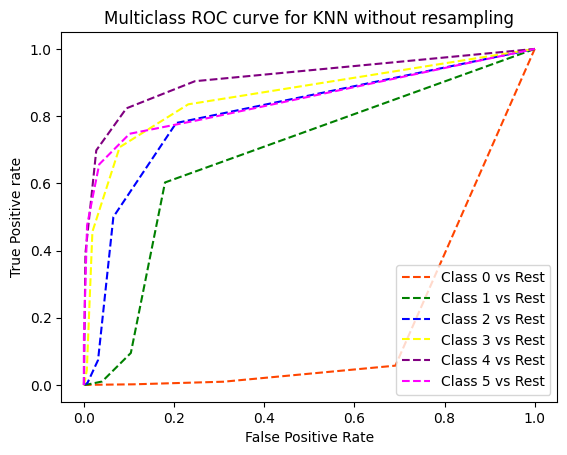

In [103]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN without resampling',dpi=300)

## KNN Algorithm without resampling  - Hyperparameter Tuning

In [ ]:
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn_classifier, param_grid, cv=3, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.462995,0.008643,8.119740,0.149761,1,{'n_neighbors': 1},0.795264,0.795625,0.794269,0.795053,0.000574,1
1,0.454201,0.010807,11.412210,0.237003,2,{'n_neighbors': 2},0.792202,0.792874,0.792370,0.792482,0.000285,2
3,0.472004,0.007263,15.266458,0.197644,4,{'n_neighbors': 4},0.786181,0.786039,0.784592,0.785604,0.000718,3
2,0.463535,0.003378,13.539474,0.137368,3,{'n_neighbors': 3},0.786220,0.784050,0.784166,0.784812,0.000997,4
4,0.487037,0.020933,18.082107,1.178584,5,{'n_neighbors': 5},0.782189,0.782060,0.780781,0.781677,0.000636,5


## KNN Algorithm without resampling - Setting the right hyperparameters

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [ ]:
print('Performance of KNN Algorithm without resampling - After Hyperparameter Tuning:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

Performance of KNN Algorithm without resampling - After Hyperparameter Tuning:

[[36926  2504   484   104    26     3]
 [ 2729  5956  1289   141    29     1]
 [  446  1213  2665   578    53     3]
 [  127   190   528  1099   198     5]
 [   22    28    54   208   320    24]
 [    5     5     8    14    39    28]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     40047
           1       0.60      0.59      0.59     10145
           2       0.53      0.54      0.53      4958
           3       0.51      0.51      0.51      2147
           4       0.48      0.49      0.48       656
           5       0.44      0.28      0.34        99

    accuracy                           0.81     58052
   macro avg       0.58      0.55      0.56     58052
weighted avg       0.81      0.81      0.81     58052

Accuracy: 0.8095156066974437
Precision: 0.8083869865450248
Recall: 0.8095156066974437
F1 Score: 0.8089001803002948
Cohen Kappa Score: 0.605585

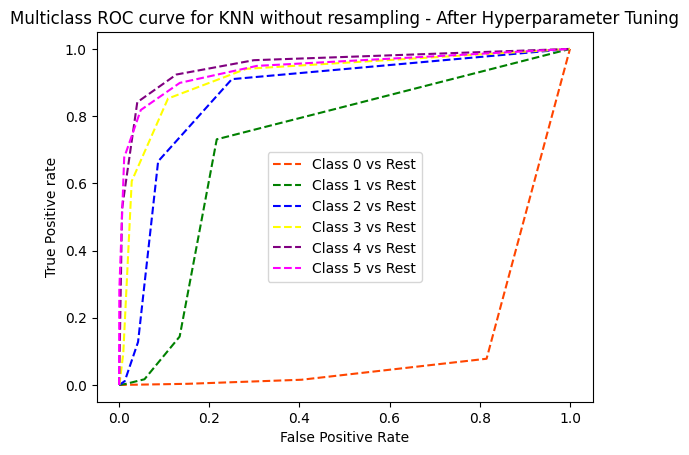

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN without resampling - After Hyperparameter Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN without resampling - After Hyperparameter Tuning',dpi=300)

# KNN Algorithm with SMOTE upsampling

In [ ]:
knn_classifier_SMOTE = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_SMOTE.fit(X_train_ures_SMOTE, y_train_ures_SMOTE)
y_pred_knn_SMOTE = knn_classifier_SMOTE.predict(X_test)

In [ ]:
print('Performance of KNN Algorithm with SMOTE Upsampling:\n')
print(confusion_matrix(y_test, y_pred_knn_SMOTE))
print(classification_report(y_test, y_pred_knn_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_pred_knn_SMOTE))
print('Precision:',precision_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_SMOTE))

Performance of KNN Algorithm with SMOTE Upsampling:

[[36196  2931   668   179    62    11]
 [ 2307  6198  1418   169    43    10]
 [  298  1154  2810   621    64    11]
 [   72   136   514  1183   232    10]
 [    8    24    49   210   340    25]
 [    3     4     3    17    39    33]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     40047
           1       0.59      0.61      0.60     10145
           2       0.51      0.57      0.54      4958
           3       0.50      0.55      0.52      2147
           4       0.44      0.52      0.47       656
           5       0.33      0.33      0.33        99

    accuracy                           0.81     58052
   macro avg       0.55      0.58      0.56     58052
weighted avg       0.81      0.81      0.81     58052

Accuracy: 0.8054847378212637
Precision: 0.8136566461486103
Recall: 0.8054847378212637
F1 Score: 0.8092115029143286
Cohen Kappa Score: 0.6084447487342688


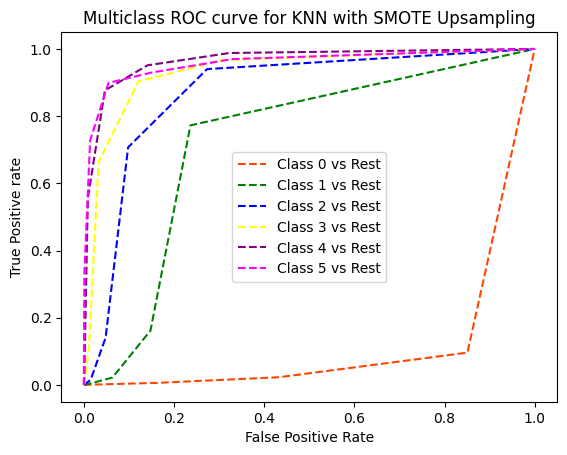

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn_SMOTE, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with SMOTE Upsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with SMOTE Upsampling',dpi=300)

## KNN Algorithm with Near Miss downsampling

In [ ]:
knn_classifier_NM = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_NM.fit(X_train_dres_nm, y_train_dres_nm)
y_pred_knn_NM = knn_classifier_NM.predict(X_test)

In [ ]:
print('Performance of KNN Algorithm with NM Downsampling:\n')
print(confusion_matrix(y_test, y_pred_knn_NM))
print(classification_report(y_test, y_pred_knn_NM))
print('Accuracy:',accuracy_score(y_test, y_pred_knn_NM))
print('Precision:',precision_score(y_test, y_pred_knn_NM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn_NM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn_NM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_NM))

Performance of KNN Algorithm with NM Downsampling:

[[ 3667 13912  6353  4372  3288  8455]
 [  782  3092  1755  1232   939  2345]
 [  355  1439   769   660   464  1271]
 [  150   491   291   367   273   575]
 [   26    87    82   108   147   206]
 [    1     4     5     9    25    55]]
              precision    recall  f1-score   support

           0       0.74      0.09      0.16     40047
           1       0.16      0.30      0.21     10145
           2       0.08      0.16      0.11      4958
           3       0.05      0.17      0.08      2147
           4       0.03      0.22      0.05       656
           5       0.00      0.56      0.01        99

    accuracy                           0.14     58052
   macro avg       0.18      0.25      0.10     58052
weighted avg       0.55      0.14      0.16     58052

Accuracy: 0.13947839867704817
Precision: 0.545704295698459
Recall: 0.13947839867704817
F1 Score: 0.16228984464115714
Cohen Kappa Score: 0.0043065835930202745


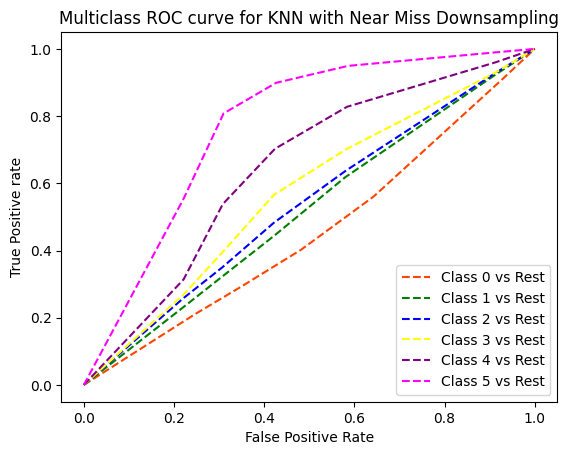

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn_NM, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with Near Miss Downsampling',dpi=300)

## Naive Bayes Algorithm without resampling

In [ ]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_pred_NB = NB_classifier.predict(X_test)

In [ ]:
print('Performance of Naive Bayes Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_NB))
print('Accuracy:',accuracy_score(y_test, y_pred_NB))
print('Precision:',precision_score(y_test, y_pred_NB, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NB, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NB))

Performance of Naive Bayes Algorithm without resampling:

[[34086  3019  1410   485   508   539]
 [ 7999   857   649   253   204   183]
 [ 3760   387   388   173   133   117]
 [ 1514   134   141   133   139    86]
 [  384    25    66    34    85    62]
 [   44     6     1     6    14    28]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.78     40047
           1       0.19      0.08      0.12     10145
           2       0.15      0.08      0.10      4958
           3       0.12      0.06      0.08      2147
           4       0.08      0.13      0.10       656
           5       0.03      0.28      0.05        99

    accuracy                           0.61     58052
   macro avg       0.21      0.25      0.20     58052
weighted avg       0.54      0.61      0.57     58052

Accuracy: 0.6128471025976711
Precision: 0.5438367008723729
Recall: 0.6128471025976711
F1 Score: 0.568916714072366
Cohen Kappa Score: 0.06477468506496975


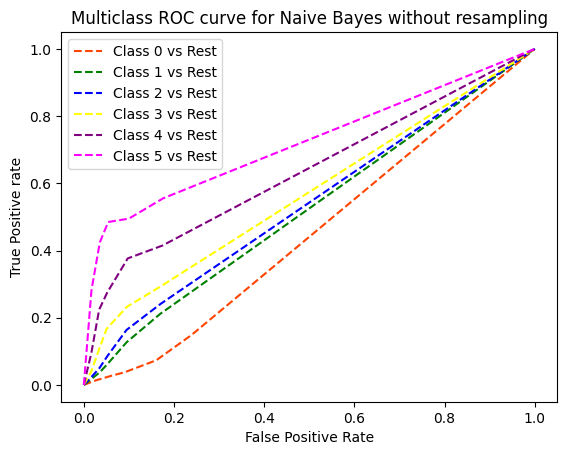

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NB, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Naive Bayes without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Naive Bayes without resampling',dpi=300)

## Random Forest Algorithm without resampling

In [ ]:
RF_classifier = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

In [ ]:
print('Performance of RF Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))
print('Accuracy:',accuracy_score(y_test, y_pred_RF))
print('Precision:',precision_score(y_test, y_pred_RF, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_RF, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_RF, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_RF))

Performance of RF Algorithm without resampling:

[[38478  1407   130    27     5     0]
 [ 4124  5125   835    52     9     0]
 [ 1185  1093  2290   371    19     0]
 [  458   192   479   894   124     0]
 [  120    39    59   165   262    11]
 [   29     5     8    12    30    15]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     40047
           1       0.65      0.51      0.57     10145
           2       0.60      0.46      0.52      4958
           3       0.59      0.42      0.49      2147
           4       0.58      0.40      0.47       656
           5       0.58      0.15      0.24        99

    accuracy                           0.81     58052
   macro avg       0.64      0.48      0.53     58052
weighted avg       0.79      0.81      0.80     58052

Accuracy: 0.810721422173224
Precision: 0.7926213817363378
Recall: 0.810721422173224
F1 Score: 0.7966333509751211
Cohen Kappa Score: 0.5719044200523287


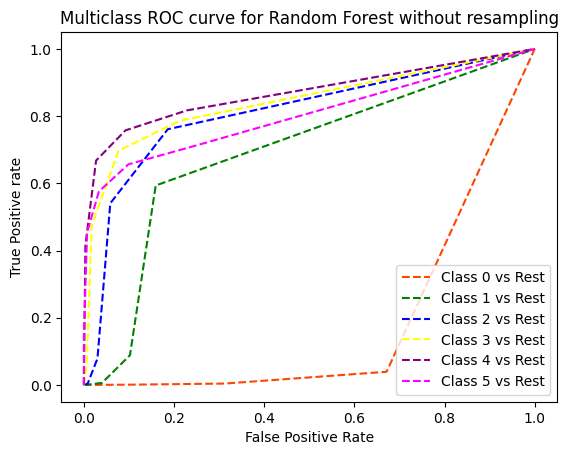

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_RF, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest without resampling',dpi=300)

## Random Forest Algorithm without resampling - Hyperparameter Tuning

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

In [ ]:
RF_random = RandomizedSearchCV(estimator = RF_classifier, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=0, n_jobs = -1)
RF_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=70,
                                                    n_estimators=20,
                                                    random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 14, 18, 23, 27, 32,
                                                         36, 41, 45, 50]},
                   random_state=0, verbose=2)

In [ ]:
RF_random.best_params_

{'n_estimators': 50,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

## Random Forest Algorithm without resampling - Setting the right Hyperparameters

In [ ]:
RF_classifier = RandomForestClassifier(n_estimators = 50, max_depth=80, bootstrap=False, max_features='sqrt', random_state=0)
RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

In [ ]:
print('Performance of RF Algorithm without resampling - After Hyperparamter Tuning:\n')
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))
print('Accuracy:',accuracy_score(y_test, y_pred_RF))
print('Precision:',precision_score(y_test, y_pred_RF, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_RF, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_RF, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_RF))

Performance of RF Algorithm without resampling - After Hyperparamter Tuning:

[[38571  1334   124    14     4     0]
 [ 3822  5433   822    57    11     0]
 [  997  1104  2439   394    23     1]
 [  363   157   493   995   137     2]
 [   96    30    51   195   274    10]
 [   29     2     5    13    32    18]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     40047
           1       0.67      0.54      0.60     10145
           2       0.62      0.49      0.55      4958
           3       0.60      0.46      0.52      2147
           4       0.57      0.42      0.48       656
           5       0.58      0.18      0.28        99

    accuracy                           0.82     58052
   macro avg       0.65      0.51      0.56     58052
weighted avg       0.81      0.82      0.81     58052

Accuracy: 0.8221938951285055
Precision: 0.8066484543629399
Recall: 0.8221938951285055
F1 Score: 0.8104620386117257
Cohen Kappa Score: 0.60255951

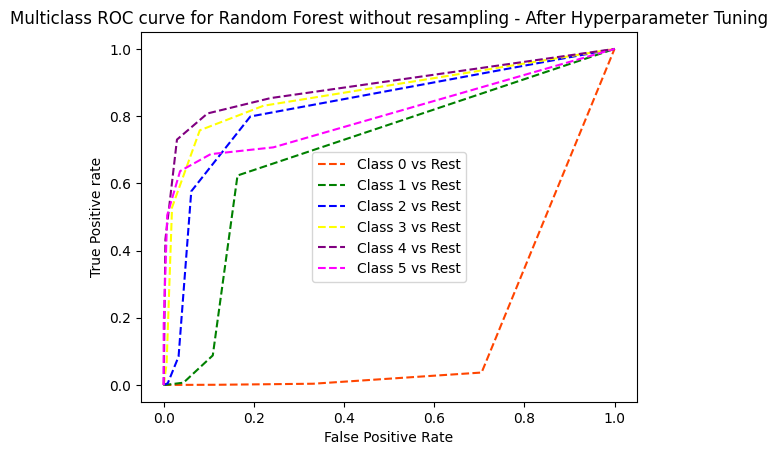

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_RF, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest without resampling - After Hyperparameter Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest without resampling - After Hyperparameter Tuning',dpi=300)

# <font color='orangered'> Performance Analysis

In [ ]:
all_labels = pd.DataFrame()
all_labels['Actual_label'] = y_test
all_labels['y_pred_DT'] = y_pred_DT
all_labels['y_pred_NM'] = y_pred_NM
all_labels['y_pred_SMOTE'] = y_pred_SMOTE
all_labels['y_pred_NM_PCA'] = y_pred_NM_PCA
all_labels['y_pred_SMOTE_PCA'] = y_pred_SMOTE_PCA
all_labels['y_pred_NM_LDA'] = y_pred_NM_LDA
all_labels['y_pred_SMOTE_LDA'] = y_pred_SMOTE_LDA
all_labels['y_pred_KNN'] = y_pred_knn
all_labels['y_pred_KNN_SMOTE'] = y_pred_knn_SMOTE
all_labels['y_pred_KNN_NM'] = y_pred_knn_NM
all_labels['y_pred_NB'] = y_pred_NB
all_labels['y_pred_RF'] = y_pred_RF

In [ ]:
data = [
{'Algorithm':'Decision Tree Algorithm with Near Miss Downsampling','Accuracy': 0.156842141528285,'Precision': 0.5679007974061838,'Recall': 0.156842141528285,'F1 Score': 0.19653152792488968,'Cohen Kappa Score': 0.010263589289324915},
{'Algorithm':'Decision Tree Algorithm with SMOTE Upsampling', 'Accuracy': 0.7655722455729346,'Precision': 0.7833196213630906,'Recall': 0.7655722455729346,'F1 Score': 0.7732958584084495,'Cohen Kappa Score': 0.5383250909136559},
{'Algorithm':'Decision Tree Algorithm with Near Miss Downsampling and PCA', 'Accuracy': 0.17458485495762419,'Precision': 0.5223608926043989, 'Recall': 0.17458485495762419, 'F1 Score': 0.23183764614555874,'Cohen Kappa Score': 0.0002605938328423818},
{'Algorithm':'Decision Tree Algorithm with SMOTE Upsampling and PCA','Accuracy': 0.7165472335147799, 'Precision': 0.7516002844799927,'Recall': 0.7165472335147799,'F1 Score': 0.7310941123216452,'Cohen Kappa Score': 0.45979839689762125},
{'Algorithm':'Decision Tree Algorithm with Near Miss Downsampling and LDA','Accuracy': 0.2304485633569903,'Precision': 0.5615916510301507,'Recall': 0.2304485633569903,'F1 Score': 0.3053259553558763,'Cohen Kappa Score': 0.023583735693796792},
{'Algorithm':'Decision Tree Algorithm with SMOTE Upsampling and LDA','Accuracy': 0.6579790532625922, 'Precision': 0.7245373327522295,'Recall': 0.6579790532625922, 'F1 Score': 0.6839866684186562,'Cohen Kappa Score': 0.3808859063535517},
{'Algorithm':'Decision Tree Algorithm without resampling', 'Accuracy': 0.7742713429339213,'Precision': 0.7711795101343347,'Recall': 0.7742713429339213,'F1 Score': 0.7726672440337348,'Cohen Kappa Score': 0.529983984426315},
{'Algorithm':'KNN Algorithm without resampling', 'Accuracy': 0.8095156066974437,'Precision': 0.8083869865450248,'Recall': 0.8095156066974437,'F1 Score': 0.8089001803002948,'Cohen Kappa Score': 0.6055851719768177},
{'Algorithm':'KNN Algorithm with SMOTE Upsampling','Accuracy': 0.8054847378212637,'Precision': 0.8136566461486103,'Recall': 0.8054847378212637,'F1 Score': 0.8092115029143286,'Cohen Kappa Score': 0.6084447487342688},
{'Algorithm':'KNN Algorithm with NM Downsampling', 'Accuracy': 0.13947839867704817,'Precision': 0.545704295698459,'Recall': 0.13947839867704817,'F1 Score': 0.16228984464115714,'Cohen Kappa Score': 0.00430658359302020745},
{'Algorithm':'Naive Bayes Algorithm without resampling' , 'Accuracy': 0.6128471025976711,'Precision': 0.5438367008723729,'Recall': 0.6128471025976711,'F1 Score': 0.568916714072366,'Cohen Kappa Score': 0.06477468506496975},
{'Algorithm':'RF Algorithm without resampling', 'Accuracy': 0.8221938951285055,'Precision': 0.8066484543629399,'Recall': 0.8221938951285055,'F1 Score': 0.8104620386117257,'Cohen Kappa Score': 0.6025595113931286}]
performance_metrics = pd.DataFrame(data)
performance_metrics.sort_values(by=['Accuracy', 'Cohen Kappa Score'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
11,RF Algorithm without resampling,0.822194,0.806648,0.822194,0.810462,0.602560
7,KNN Algorithm without resampling,0.809516,0.808387,0.809516,0.808900,0.605585
8,KNN Algorithm with SMOTE Upsampling,0.805485,0.813657,0.805485,0.809212,0.608445
6,Decision Tree Algorithm without resampling,0.774271,0.771180,0.774271,0.772667,0.529984
1,Decision Tree Algorithm with SMOTE Upsampling,0.765572,0.783320,0.765572,0.773296,0.538325
3,Decision Tree Algorithm with SMOTE Upsampling ...,0.716547,0.751600,0.716547,0.731094,0.459798
5,Decision Tree Algorithm with SMOTE Upsampling ...,0.657979,0.724537,0.657979,0.683987,0.380886
10,Naive Bayes Algorithm without resampling,0.612847,0.543837,0.612847,0.568917,0.064775
4,Decision Tree Algorithm with Near Miss Downsam...,0.230449,0.561592,0.230449,0.305326,0.023584
2,Decision Tree Algorithm with Near Miss Downsam...,0.174585,0.522361,0.174585,0.231838,0.000261


# Saving final model

In [ ]:
pickle.dump(RF_classifier, open('/content/drive/MyDrive/lectures/drought/weights/RF_classifier.pkl', 'wb'))